In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('vehicle_data.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

C:\Users\joaop\AppData\Local\Temp\ipykernel_12044\977830777.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicle_data.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           123971 non-null  object
 1   Sub_title       123971 non-null  object
 2   Price           123971 non-null  object
 3   Brand           123971 non-null  object
 4   Model           123970 non-null  object
 5   Edition         47538 non-null   object
 6   Year            123971 non-null  int64 
 7   Condition       123971 non-null  object
 8   Transmission    123970 non-null  object
 9   Body            118876 non-null  object
 10  Fuel            123971 non-null  object
 11  Capacity        123766 non-null  object
 12  Mileage         123971 non-null  object
 13  Location        123971 non-null  object
 14  Description     107797 non-null  object
 15  Post_URL        123971 non-null  object
 16  Seller_name     123873 non-null  object
 17  Seller_type     123971 non-nu

### TRADUZINDO BASE DADOS 

In [3]:
df_traduzida = df.rename(columns={'Title':'Titulo','Sub_title':'SubTitulo','Price':'Preço','Brand':'Marca','Model':'Modelo','Edition':'Edição','Year':'Ano','Condition':'CondiçãoVeículo','Transmission':'Transmissão','Body':'TipoCarroceria','Fuel':'Combustível','Capacity':'Capacidade','Mileage':'Quilometragem','Location':'Localização','Description':'Descrição','Seller_name':'NomeVendedor','Seller_type':'VendedorTipo','published_date':'DataPublicada'})
df_traduzida.head(1)

,Titulo,SubTitulo,Preço,Marca,Modelo,Edição,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,Descrição,Post_URL,NomeVendedor,VendedorTipo,DataPublicada
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00


# MANIPULAÇÃO E TRATAMENTO DE DADOS 

In [4]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Titulo           123971 non-null  object
 1   SubTitulo        123971 non-null  object
 2   Preço            123971 non-null  object
 3   Marca            123971 non-null  object
 4   Modelo           123970 non-null  object
 5   Edição           47538 non-null   object
 6   Ano              123971 non-null  int64 
 7   CondiçãoVeículo  123971 non-null  object
 8   Transmissão      123970 non-null  object
 9   TipoCarroceria   118876 non-null  object
 10  Combustível      123971 non-null  object
 11  Capacidade       123766 non-null  object
 12  Quilometragem    123971 non-null  object
 13  Localização      123971 non-null  object
 14  Descrição        107797 non-null  object
 15  Post_URL         123971 non-null  object
 16  NomeVendedor     123873 non-null  object
 17  VendedorTi

### CONVERTENDO VARIVEIS 

In [5]:
### FIZEMOS UM TRATAMENTO PARA REMOVER OS CARACTERES ESPECIAIS PARA A CONVERSÃO DAS VARIAVEIs 

df_traduzida['Preço'] = pd.to_numeric(df_traduzida["Preço"].str.replace("Rs"," ").str.replace(',' ,'').str.replace('.', '').str.replace('Negotiable', '').str.replace(" ", ''),downcast="float")

In [6]:
### FIZEMOS UM TRATAMENTO PARA REMOVER OS CARACTERES ESPECIAIS PARA A CONVERSÃO DAS VARIAVEIs 

df_traduzida['Quilometragem'] = pd.to_numeric(df_traduzida['Quilometragem'].str.replace("km"," ").str.replace(","," ").str.replace(" ",'').str.replace("-",''),downcast="float")

In [7]:
### FIZEMOS UM TRATAMENTO PARA REMOVER OS CARACTERES ESPECIAIS PARA A CONVERSÃO DAS VARIAVEIs 
df_traduzida['Capacidade'] = pd.to_numeric(df_traduzida['Capacidade'].str.replace("cc"," ").str.replace(","," ").str.replace(" ",'').str.replace("-",'').str.replace('Manual', '').str.replace('Automatic', ''),downcast="float")

In [8]:
df_traduzida['DataPublicada'] = pd.to_datetime(df_traduzida['DataPublicada'])

In [9]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Titulo           123971 non-null  object        
 1   SubTitulo        123971 non-null  object        
 2   Preço            118456 non-null  float64       
 3   Marca            123971 non-null  object        
 4   Modelo           123970 non-null  object        
 5   Edição           47538 non-null   object        
 6   Ano              123971 non-null  int64         
 7   CondiçãoVeículo  123971 non-null  object        
 8   Transmissão      123970 non-null  object        
 9   TipoCarroceria   118876 non-null  object        
 10  Combustível      123971 non-null  object        
 11  Capacidade       119209 non-null  float64       
 12  Quilometragem    118283 non-null  float64       
 13  Localização      123971 non-null  object        
 14  Descrição        107

### EXCLUINDO VARIAVEIS QUE NÃO SÃO ÚTEIS

In [10]:
del df_traduzida['SubTitulo']
del df_traduzida['Post_URL']
del df_traduzida['Descrição']
del df_traduzida['Edição']
del df_traduzida['Titulo']

### VERIFICANDO OS VALORES NULOS

In [11]:
(df_traduzida.isnull().sum() / len(df_traduzida['Preço']))*100

Preço             4.45
Marca             0.00
Modelo            0.00
Ano               0.00
CondiçãoVeículo   0.00
Transmissão       0.00
TipoCarroceria    4.11
Combustível       0.00
Capacidade        3.84
Quilometragem     4.59
Localização       0.00
NomeVendedor      0.08
VendedorTipo      0.00
DataPublicada     0.00
dtype: float64

#### PREENCHENDO VALORES NULOS

In [12]:
m = df_traduzida['Preço'].median()
df_traduzida['Preço'] = df_traduzida['Preço'].fillna(m)
df_traduzida['Quilometragem'] = df_traduzida['Quilometragem'].fillna(m)
df_traduzida['Capacidade'] = df_traduzida['Capacidade'].fillna(m)

#### EXCLUINDO VALORES NULOS

In [13]:
df_traduzida = df_traduzida.dropna(subset=['TipoCarroceria'])

In [14]:
(df_traduzida.isnull().sum() / len(df_traduzida['Preço']))*100

Preço             0.00
Marca             0.00
Modelo            0.00
Ano               0.00
CondiçãoVeículo   0.00
Transmissão       0.00
TipoCarroceria    0.00
Combustível       0.00
Capacidade        0.00
Quilometragem     0.00
Localização       0.00
NomeVendedor      0.08
VendedorTipo      0.00
DataPublicada     0.00
dtype: float64

#### DUPLICADOS

In [15]:
df_traduzida.duplicated().sum()

873

In [16]:
df_traduzida = df_traduzida.drop_duplicates()

# ANÁLISE DE DADOS EXPLORATÓRIA

### ESTATISTICA DESCRITIVA

In [17]:
df_traduzida.describe()

,Preço,Ano,Capacidade,Quilometragem,DataPublicada
count,118003.00,118003.00,118003.00,118003.00,118003
mean,6347294.68,2008.37,177608.32,552744.71,2022-02-19 12:31:48.996381440
min,85.00,0.00,0.00,0.00,2021-09-06 05:37:00
25%,1325000.00,2004.00,660.00,37000.00,2021-10-15 19:38:30
50%,4000000.00,2013.00,1330.00,75000.00,2021-11-04 08:14:00
75%,7150000.00,2016.00,1800.00,133000.00,2022-07-25 07:51:30
max,775025637.00,2561.00,701017829.00,4596362518.00,2022-12-31 23:39:00
std,10306637.10,25.84,2856341.19,19546752.34,NaN


### MODA

In [18]:
from statistics import mode
mode(df_traduzida['Preço'])

4000000.0

In [19]:
mode(df_traduzida['Capacidade'])

1500.0

In [20]:
mode(df_traduzida['Quilometragem'])

4000000.0

### ASSIMETRIA

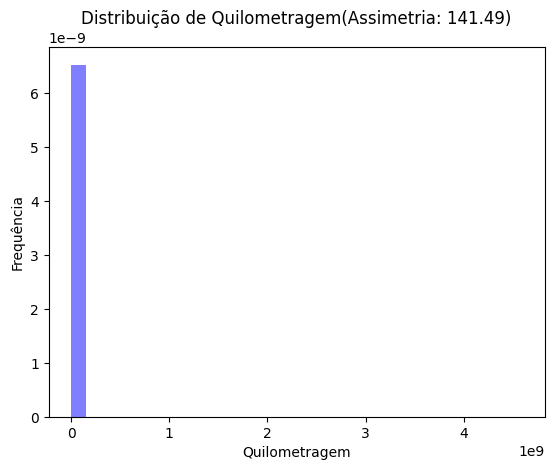

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import skew

Quilometragem = df_traduzida['Quilometragem']

# Calculando a assimetria dos dados
assimetria = skew(Quilometragem)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(Quilometragem, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Quilometragem(Assimetria: {assimetria:.2f})')
plt.xlabel('Quilometragem')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


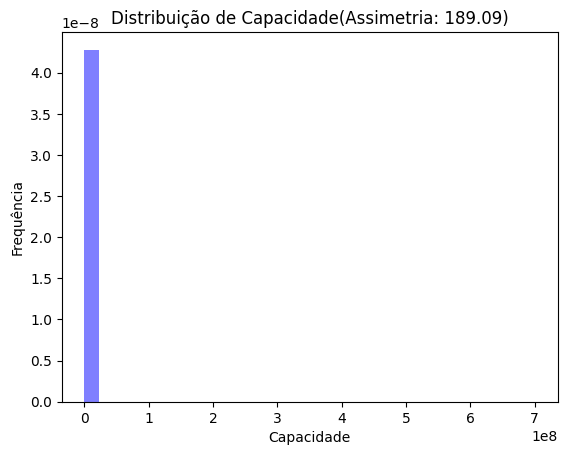

In [22]:
Capacidade = df_traduzida['Capacidade']

# Calculando a assimetria dos dados
assimetria = skew(Capacidade)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(Capacidade, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Capacidade(Assimetria: {assimetria:.2f})')
plt.xlabel('Capacidade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

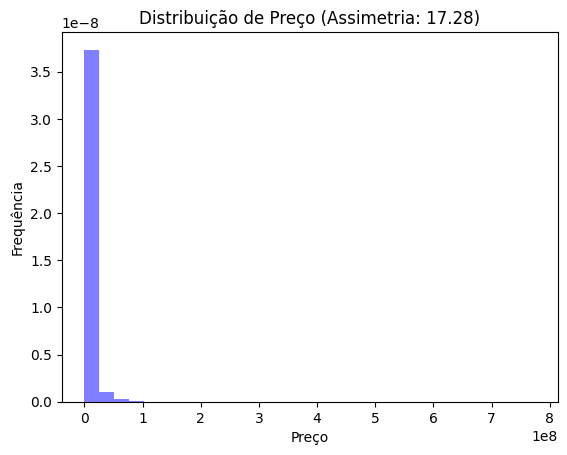

In [23]:
Preço = df_traduzida['Preço']

# Calculando a assimetria dos dados
assimetria = skew(Preço)

# Criando um histograma para visualizar a distribuição dos dados
plt.hist(Preço, bins=30, density=True, alpha=0.5, color='b')

# Adicionando informações ao gráfico
plt.title(f'Distribuição de Preço (Assimetria: {assimetria:.2f})')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

### CURTOSE

In [24]:
df_traduzida['Quilometragem'].kurt()

27924.966086519737

In [25]:
df_traduzida['Preço'].kurt()

1010.3248826060047

In [26]:
df_traduzida['Capacidade'].kurt()

40633.640304614695

array([[<Axes: title={'center': 'Preço'}>,
        <Axes: title={'center': 'Ano'}>],
       [<Axes: title={'center': 'Capacidade'}>,
        <Axes: title={'center': 'Quilometragem'}>],
       [<Axes: title={'center': 'DataPublicada'}>, <Axes: >]],
      dtype=object)

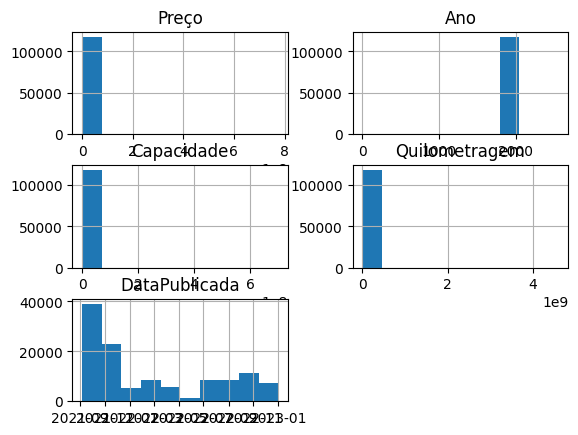

In [27]:
df_traduzida.hist()

### TOTAL DE VALORES UNICOS EM CADA VARIAVEL

In [28]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

Preço : 3512
Marca : 123
Modelo : 8503
Ano : 88
CondiçãoVeículo : 5
Transmissão : 22
TipoCarroceria : 22
Combustível : 9
Capacidade : 1405
Quilometragem : 14589
Localização : 328
NomeVendedor : 35289


### VERIFICANDO SE HÁ POSSIBILIDADE DE OUTLIERS E TRATAMENTO DO MESMO

Preço : float64
Ano : int64
Capacidade : float64
Quilometragem : float64


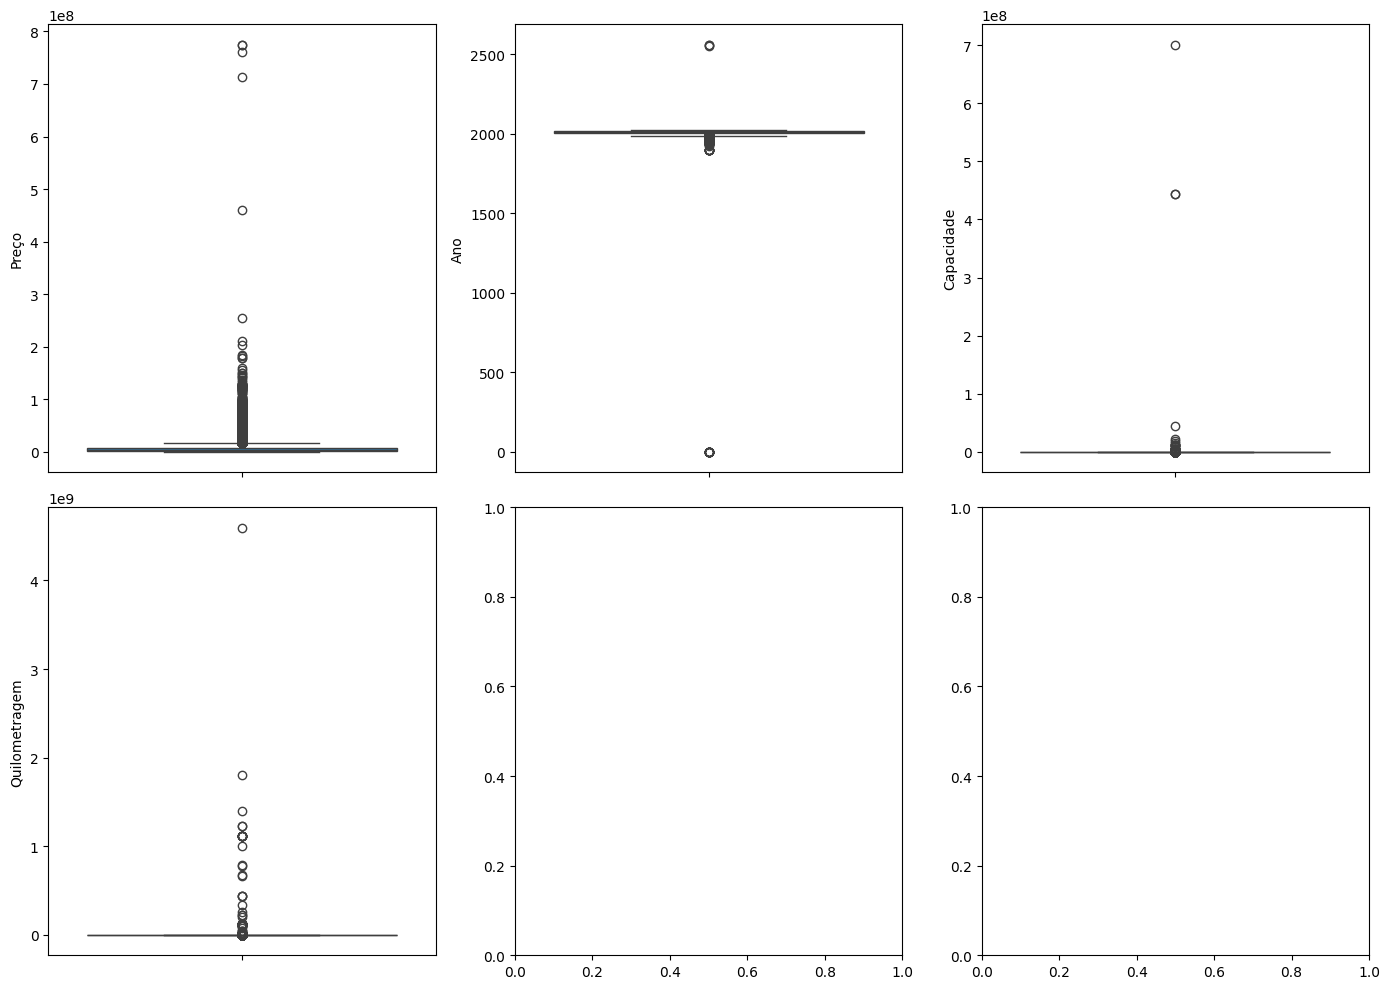

In [29]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

In [30]:
### SEPRANDO AS COLUNAS QUE CONTÉM POSSIVÉIS OUTlIlERS 

out = df_traduzida[['Preço','Capacidade','Ano','Quilometragem']]
out.head(1)

,Preço,Capacidade,Ano,Quilometragem
0,12900000.00,1500.00,2017,37000.00


In [31]:
# AQUI VAMOS TREINAR O ALGORITMO PARA VERIFICAR OS OUTLIERS
#!pip install pyod
# Importando o pacote PYOD
from pyod.models.knn import KNN

In [32]:
# Instanciando o objeto KNN
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(out)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [33]:
# A probabilidade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([106202,  11801], dtype=int64))

In [35]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([1000.        , 8030.56716552,  309.73859947, ..., 3000.00016667,
       5000.0001    , 1000.24197073])

In [36]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [37]:
# Lista com os ID´s dos registros que foram considerados OUTLIERS
print(outliers)

[6, 18, 21, 25, 27, 35, 53, 56, 67, 70, 74, 81, 82, 88, 93, 106, 110, 125, 133, 148, 157, 178, 179, 188, 196, 201, 203, 219, 221, 225, 246, 255, 257, 261, 267, 292, 319, 328, 336, 349, 358, 361, 367, 375, 377, 383, 397, 405, 422, 426, 437, 441, 443, 445, 450, 454, 468, 470, 471, 474, 485, 489, 493, 503, 514, 516, 520, 523, 525, 541, 555, 562, 563, 568, 576, 577, 579, 582, 584, 590, 623, 626, 640, 643, 665, 680, 682, 685, 692, 705, 711, 713, 715, 728, 737, 760, 776, 781, 784, 787, 789, 794, 802, 823, 827, 843, 870, 877, 881, 886, 890, 906, 909, 914, 923, 932, 942, 944, 954, 964, 965, 1013, 1053, 1081, 1098, 1108, 1112, 1115, 1152, 1154, 1156, 1164, 1165, 1175, 1184, 1186, 1191, 1218, 1225, 1227, 1233, 1250, 1259, 1263, 1279, 1281, 1283, 1285, 1298, 1300, 1319, 1327, 1329, 1337, 1346, 1354, 1373, 1376, 1383, 1384, 1385, 1386, 1398, 1418, 1465, 1467, 1482, 1502, 1514, 1521, 1534, 1544, 1560, 1584, 1589, 1592, 1602, 1625, 1629, 1631, 1647, 1664, 1665, 1669, 1676, 1723, 1741, 1751, 1789, 17

In [38]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = out.iloc[outliers,:]
lista_outliers.head()

,Preço,Capacidade,Ano,Quilometragem
6,19100000.00,1500.00,2018,37134.00
21,20800000.00,2500.00,2015,92000.00
25,8050000.00,1500.00,2016,49750.00
30,50500000.00,2000.00,2018,17000.00
33,19300000.00,2400.00,2008,117000.00


#### REMOVENDO OUTLIERS DE PREÇO

In [39]:
df_traduzida['Preço'].max()

775025637.0

In [40]:
remocao_comentario_outlhiers= (df_traduzida['Preço']>12000) &  (df_traduzida['Preço']<760713664.0)

In [41]:
df_traduzida = df_traduzida[remocao_comentario_outlhiers]

#### REMOVENDO OUTLIERS DE ANO

In [42]:
df_traduzida['Ano'].min()

0

In [43]:
remocao_comentario_outlhiers = (df_traduzida['Ano'] > 0 ) &  (df_traduzida['Ano']<2550)

In [44]:
df_traduzida = df_traduzida[remocao_comentario_outlhiers]

#### REMOVENDO OUTLIERS DE CAPACIDADE

In [45]:
df_traduzida['Capacidade'].max()

701017829.0

In [46]:
remocao_comentario_outlhiers = (df_traduzida['Capacidade'] > 0 ) &  (df_traduzida['Capacidade']<4300000.00 )

In [47]:
df_traduzida = df_traduzida[remocao_comentario_outlhiers]

#### REMOVENDO OUTLIERS DE QUILOMETRAGEM

In [48]:
df_traduzida['Quilometragem'].max()

4596362518.0

In [49]:
remocao_comentario_outlhiers = (df_traduzida['Quilometragem']<1234564864.00)

In [50]:
df_traduzida = df_traduzida[remocao_comentario_outlhiers]

### VERIFICANDO AS POSSIVEIS CORRELAÇÃO

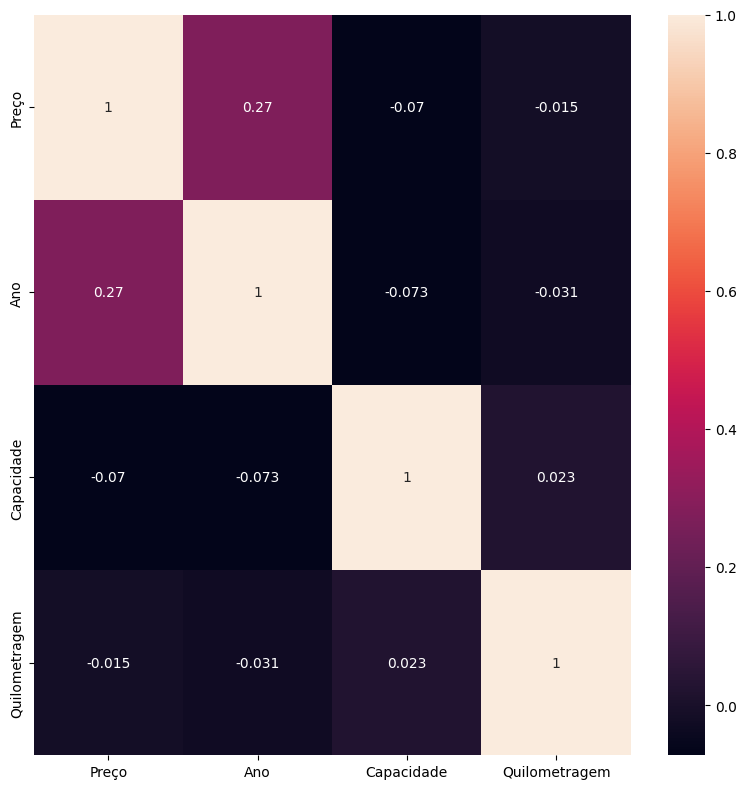

In [51]:
# Suponha que você deseja selecionar apenas colunas numéricas
df_numeric = df_traduzida.select_dtypes(include=['float64', 'int64'])

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True


sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

### ANALISANDO DADOS COM PYHWALKER

In [52]:
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS

In [53]:
df_traduzida.head(12)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
0,12900000.00,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.00,37000.00,"Kurunegala City, Kurunegala",Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,16250000.00,Jaguar,XF,2013,Used,Automatic,Saloon,Diesel,2200.00,42000.00,"Kurunegala City, Kurunegala",Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,17000000.00,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200.00,15000.00,"Colombo 7, Colombo",Carzone Lanka,Member,2022-09-16 13:16:00
3,13000000.00,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200.00,21000.00,"Colombo 7, Colombo",Carzone Lanka,Member,2022-09-30 10:12:00
4,33500000.00,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700.00,57000.00,"Kelaniya, Gampaha",Shine Music Center,Member,2022-09-30 21:50:00
5,14900000.00,Toyota,Land Cruiser Prado,2007,Used,Automatic,SUV / 4x4,Petrol,2700.00,120000.00,"Gampaha City, Gampaha",Tharusha,Member,2022-09-24 15:52:00
6,19100000.00,Honda,CRV,2018,Used,Automatic,SUV / 4x4,Petrol,1500.00,37134.00,"Gampaha City, Gampaha",RAJAPAKSHA,Member,2022-09-30 08:36:00
8,4790000.00,Suzuki,Alto,2017,Used,Automatic,Hatchback,Petrol,650.00,46521.00,"Maharagama, Colombo",MAC Enterprises,Premium-Member,2022-10-01 08:29:00
9,9200000.00,MG,ZS,2018,Used,Automatic,SUV / 4x4,Petrol,1000.00,60000.00,"Kelaniya, Gampaha",Ranjith Edirisingha,Member,2022-09-25 08:18:00
10,7800000.00,Toyota,Vitz,2017,Used,Automatic,Hatchback,Petrol,1000.00,29000.00,"Angoda, Colombo",Dilanka Prasad,Premium-Member,2022-09-28 08:20:00


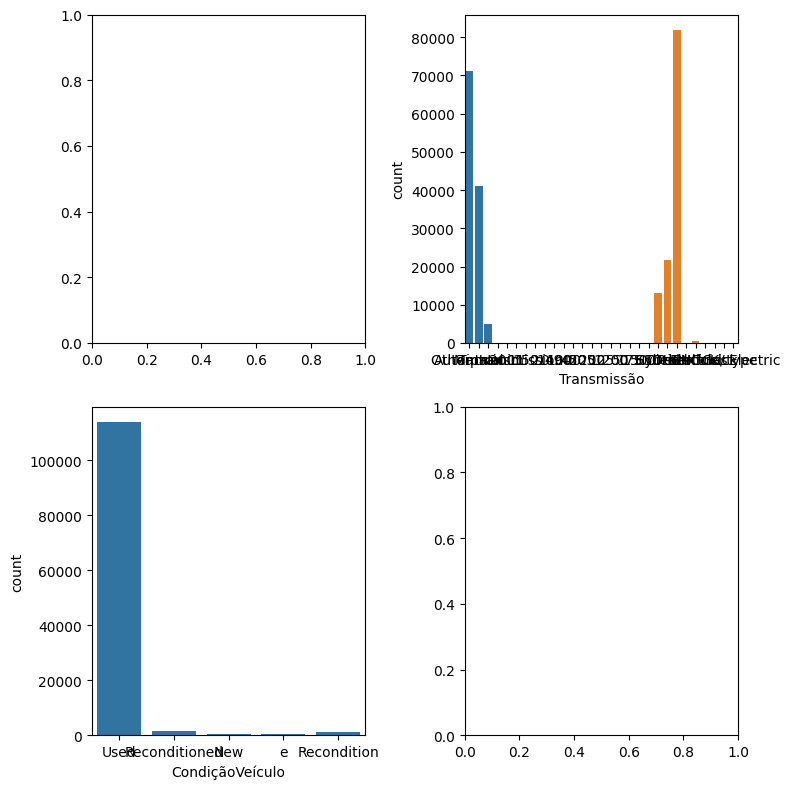

In [54]:
# Crie o gráfico de contagem
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)
sns.countplot(data=df_traduzida, x="Transmissão", ax=axes[0][1])
sns.countplot(data=df_traduzida, x="Combustível", ax=axes[0][1])
sns.countplot(data=df_traduzida, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

# ANALISANDO AS LOCALIZAÇÕES 

### MAIS VENDIDAS, LUCROS E MÉDIA DOS PREÇOS

In [55]:
total_compras = df_traduzida.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$31,678,169,751.00","$5,609,734.33",5647
Kurunegala,"$13,518,426,389.00","$2,960,023.30",4567
Gampaha,"$13,691,685,998.00","$3,193,768.60",4287
Kandy,"$14,781,970,380.00","$3,523,711.65",4195
"Kohuwala, Colombo","$80,711,112,207.00","$19,481,320.83",4143


### ANALISANDO AS 5 LOCALIZAÇÕES  MAIS VENDIDAS

### COLOMBO

In [56]:
colombo = df_traduzida[df_traduzida['Localização'].str.contains('Colombo')]
colombo.head()

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
2,17000000.00,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200.00,15000.00,"Colombo 7, Colombo",Carzone Lanka,Member,2022-09-16 13:16:00
3,13000000.00,Toyota,CHR,2017,Used,Automatic,SUV / 4x4,Petrol,1200.00,21000.00,"Colombo 7, Colombo",Carzone Lanka,Member,2022-09-30 10:12:00
8,4790000.00,Suzuki,Alto,2017,Used,Automatic,Hatchback,Petrol,650.00,46521.00,"Maharagama, Colombo",MAC Enterprises,Premium-Member,2022-10-01 08:29:00
10,7800000.00,Toyota,Vitz,2017,Used,Automatic,Hatchback,Petrol,1000.00,29000.00,"Angoda, Colombo",Dilanka Prasad,Premium-Member,2022-09-28 08:20:00
11,19990000.00,Mitsubishi,Montero,2013,Used,Automatic,SUV / 4x4,Diesel,3200.00,110000.00,"Boralesgamuwa, Colombo",Bhathiya,Premium-Member,2022-09-26 12:35:00


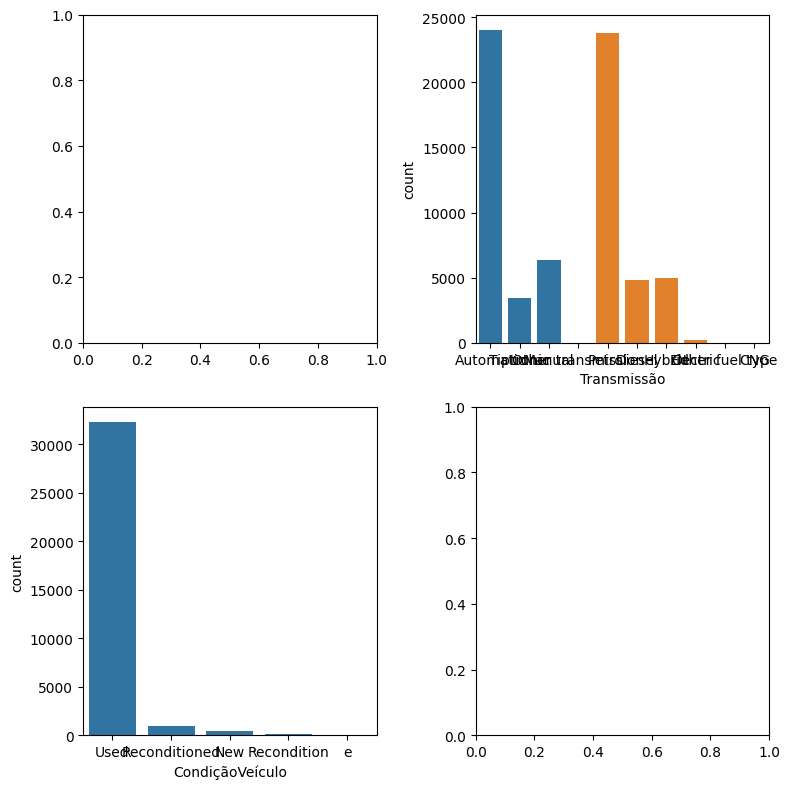

In [57]:
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)
sns.countplot(data=colombo, x="Transmissão", ax=axes[0][1])
sns.countplot(data=colombo, x="Combustível", ax=axes[0][1])
sns.countplot(data=colombo, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [58]:
total_compras = colombo.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = colombo.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = colombo.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Vitz,"$6,993,289,999.00","$6,560,309.57",1066
Alto,"$3,148,673,996.00","$3,161,319.27",996
Axio,"$7,993,144,989.00","$8,812,728.76",907
Land Cruiser Prado,"$22,265,098,999.00","$29,180,994.76",763
Aqua,"$4,645,651,997.00","$6,096,656.16",762


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [59]:
total_compras = colombo.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = colombo.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = colombo.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Nandana Enterprises,"$6,772,015,000.00","$11,477,991.53",590
Dushan Enterprise,"$3,503,130,000.00","$6,475,286.51",541
Suren Auto Mart,"$6,150,468,000.00","$12,325,587.17",499
Punchi Car Niwasa,"$1,748,653,000.00","$3,681,374.74",475
MAC Enterprises,"$2,059,365,000.00","$5,280,423.08",390


### KURUNEGALA

In [60]:
Kurunegala = df_traduzida[df_traduzida['Localização'].str.contains('Kurunegala')]
Kurunegala.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
0,12900000.00,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.00,37000.00,"Kurunegala City, Kurunegala",Prasad Enterprises,Premium-Member,2022-09-01 14:45:00


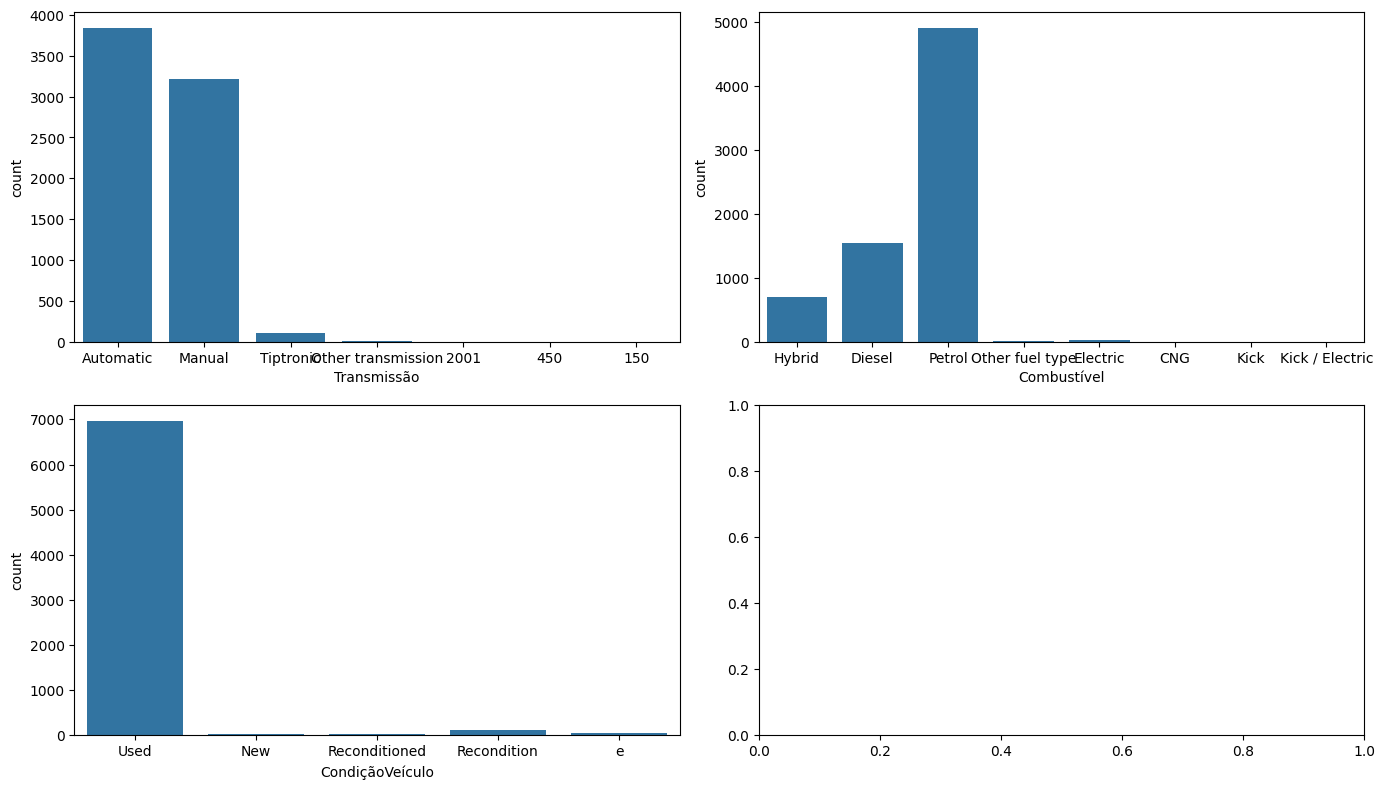

In [61]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Kurunegala, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Kurunegala, x="Combustível", ax=axes[0][1])
sns.countplot(data = Kurunegala, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [62]:
total_compras = Kurunegala.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kurunegala.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Kurunegala.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Alto,"$557,863,000.00","$2,721,282.93",205
Sunny,"$377,110,000.00","$1,866,881.19",202
Dio,"$127,978,400.00","$735,508.05",174
Vitz,"$1,085,005,000.00","$6,458,363.10",168
CT-100,"$94,518,000.00","$587,068.32",161


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [63]:
total_compras = Kurunegala.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kurunegala.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Kurunegala.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Sell Fast | à¶à·à¶½à·à¶ºà·à¶´à·à¶§à·à¶º à¶¯à·à¶±à·à·à·à¶¸à· à¶à¶ºà¶­à¶±à¶º,"$722,858,000.00","$4,252,105.88",170
Prasad Enterprises,"$1,764,100,000.00","$11,455,194.81",154
Unlimit Ads,"$484,185,000.00","$5,764,107.14",84
Sell Fast | Sampath Advertising,"$427,880,000.00","$5,282,469.14",81
Owner,"$296,732,000.00","$3,853,662.34",77


### GAMPAHA

In [64]:
Gampaha =  df_traduzida[df_traduzida['Localização'].str.contains('Gampaha')]
Gampaha.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
4,33500000.00,Toyota,Land Cruiser Prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700.00,57000.00,"Kelaniya, Gampaha",Shine Music Center,Member,2022-09-30 21:50:00


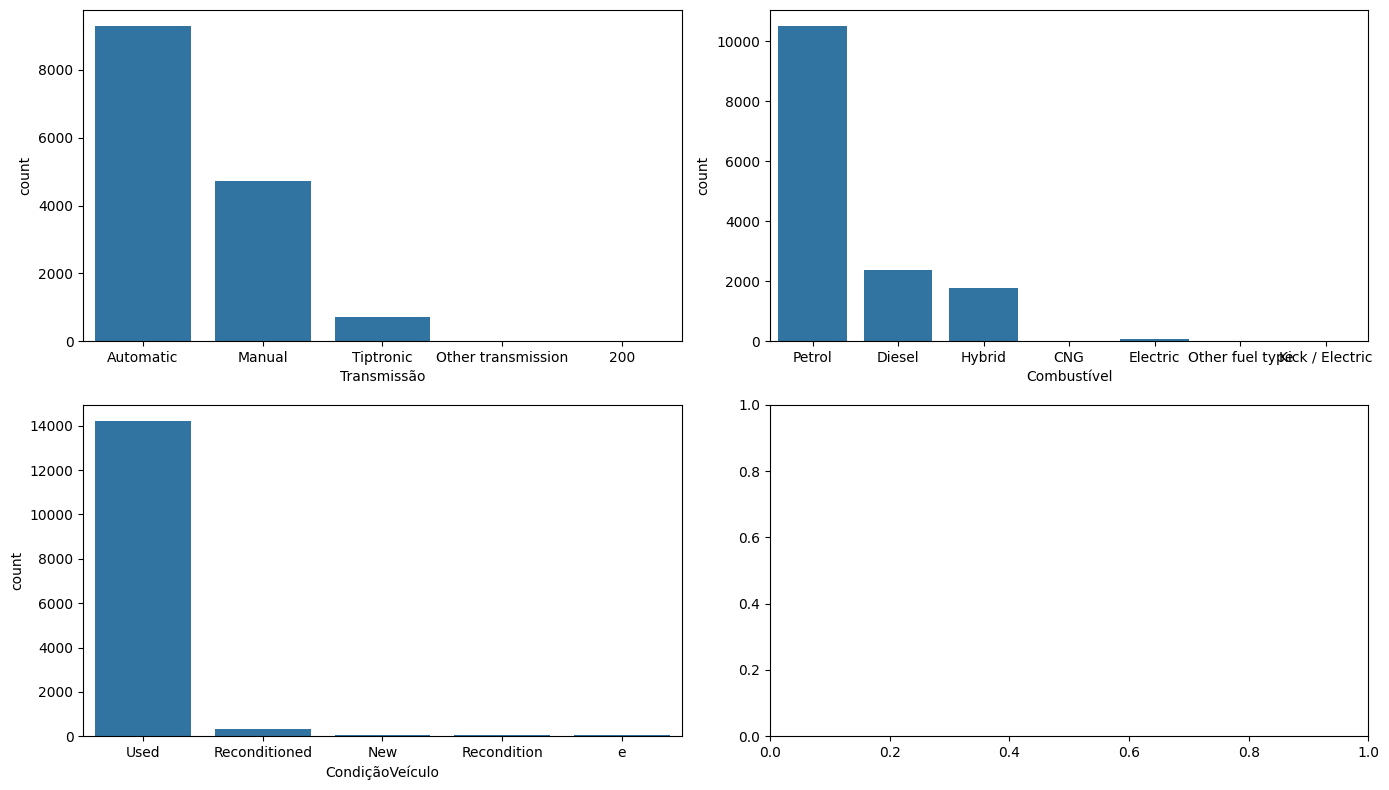

In [65]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Gampaha, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Gampaha, x="Combustível", ax=axes[0][1])
sns.countplot(data = Gampaha, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [66]:
total_compras = Gampaha.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Gampaha.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Gampaha.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Gayuki Holdings (Pvt) Ltd,"$6,207,335,000.00","$17,534,844.63",354
NIROSHAN MOTOR TRADERS,"$2,976,015,000.00","$9,156,969.23",325
D.N. Car Nivasa,"$991,330,000.00","$4,445,426.01",223
Jaela-MarutiGedara,"$371,795,000.00","$1,689,977.27",220
S & D CARS NEGOMBO,"$1,004,560,000.00","$5,740,342.86",175


### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [67]:
total_compras = Gampaha.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Gampaha.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Gampaha.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Vitz,"$3,991,340,000.00","$6,608,178.81",604
Alto,"$1,535,885,000.00","$2,925,495.24",525
Axio,"$3,006,313,000.00","$8,259,101.65",364
Corolla,"$958,208,013.00","$2,646,983.46",362
Premio,"$4,493,594,998.00","$12,802,264.95",351


### KANDY

In [68]:
Kandy = df_traduzida[df_traduzida['Localização'].str.contains('Kandy')]
Kandy.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
23,5400000.00,Suzuki,Wagon R Stingray,2014,Used,Automatic,Hatchback,Petrol,650.00,43400.00,"Katugastota, Kandy",RMS Kanthie,Premium-Member,2022-09-26 10:29:00


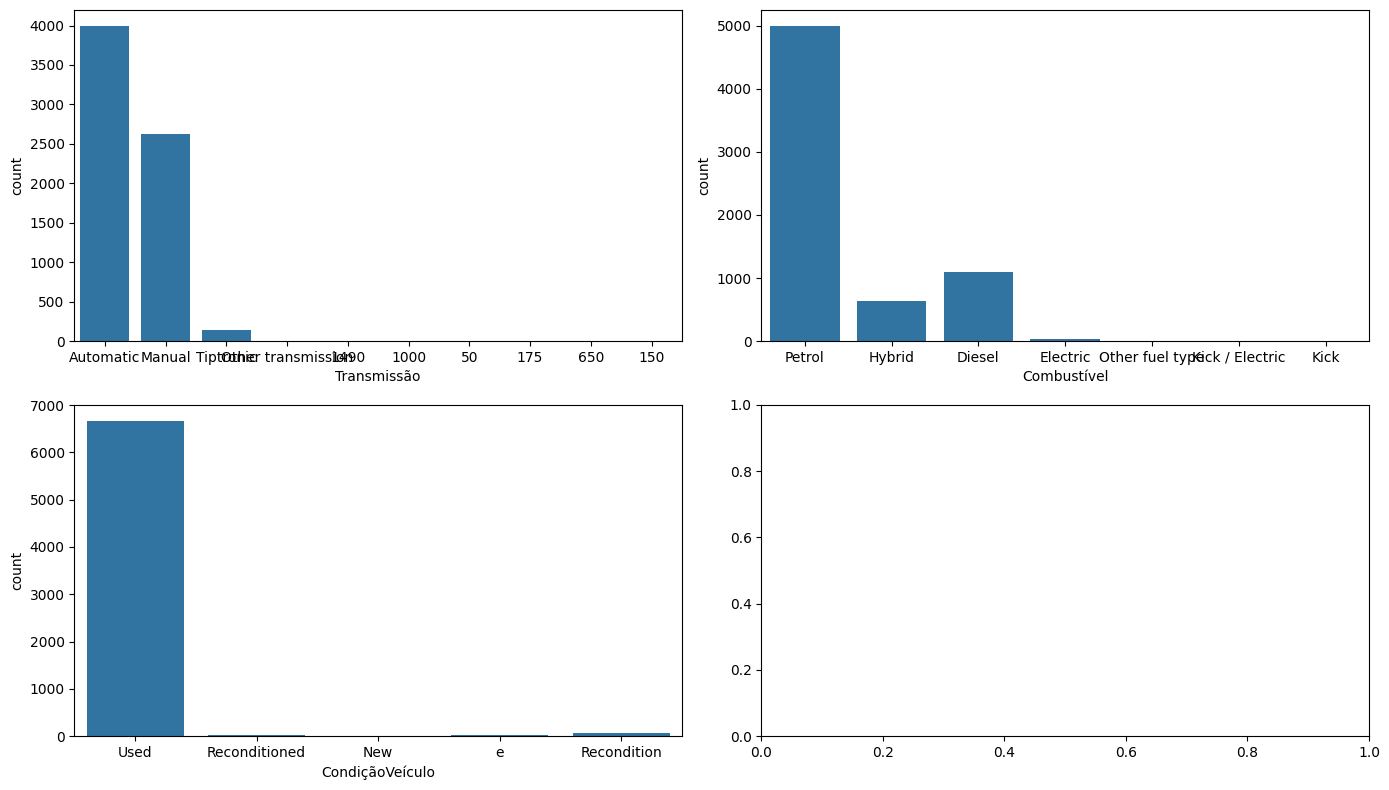

In [69]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Kandy, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Kandy, x="Combustível", ax=axes[0][1])
sns.countplot(data = Kandy, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [70]:
total_compras = Kandy.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kandy.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Kandy.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
RE,"$206,939,111.00","$1,293,369.44",160
Vitz,"$920,435,000.00","$6,055,493.42",152
Alto,"$424,081,000.00","$2,808,483.44",151
Premio,"$1,832,860,000.00","$14,098,923.08",130
Dio,"$116,391,000.00","$923,738.10",126


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [71]:
total_compras = Kandy.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kandy.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Kandy.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Villo Auto Cars,"$1,188,910,000.00","$6,391,989.25",186
Owner,"$709,147,000.00","$4,727,646.67",150
Free Bird Media (Pvt) Ltd,"$149,705,000.00","$2,138,642.86",70
Oyama Trading Co,"$878,875,000.00","$15,418,859.65",57
OTC Ads,"$682,075,000.00","$14,209,895.83",48


### KOHUWALA

In [72]:
Kohuwala = df_traduzida[df_traduzida['Localização'].str.contains('Kohuwala')]
Kohuwala.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
21,20800000.00,Toyota,Harrier,2015,Used,Automatic,SUV / 4x4,Hybrid,2500.00,92000.00,"Kohuwala, Colombo",Krish Carz,Premium-Member,2022-10-01 07:45:00


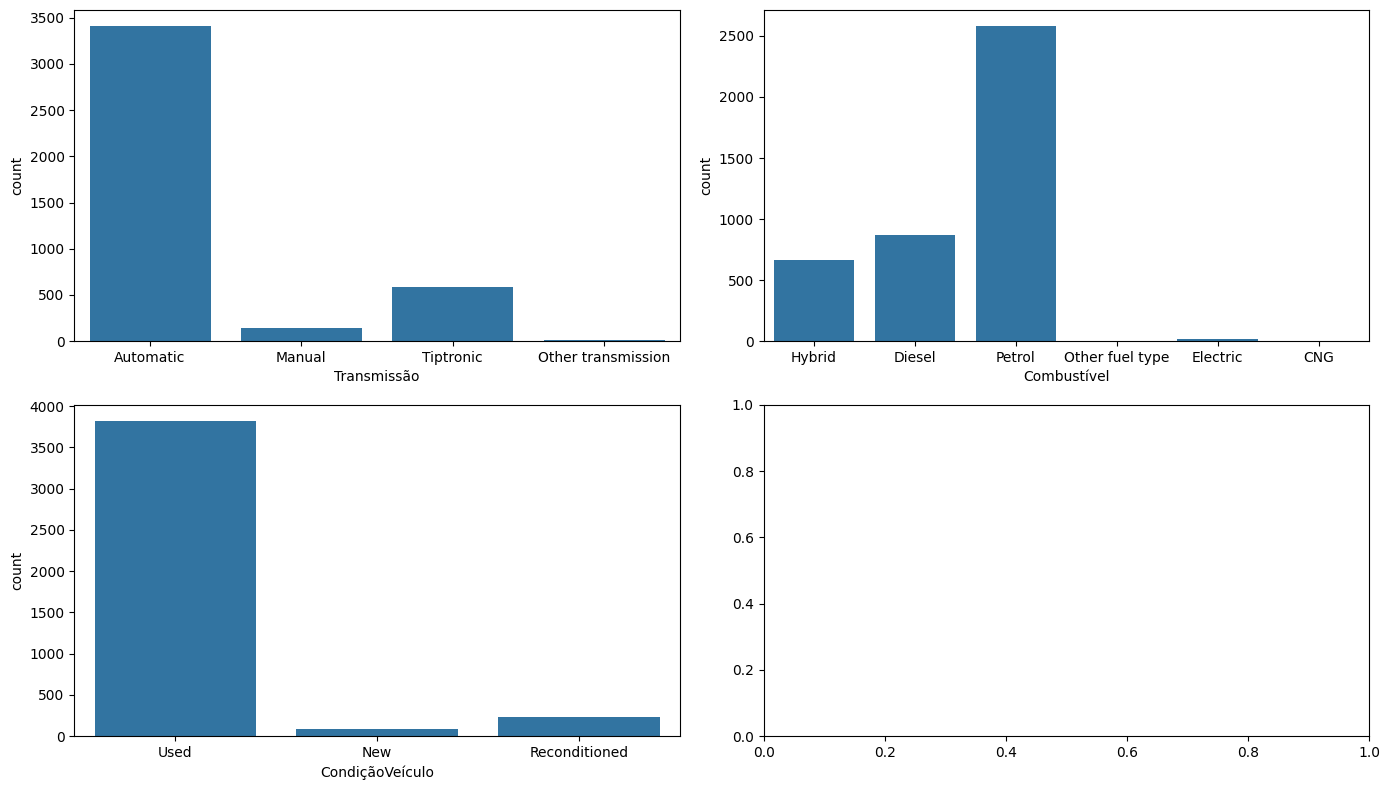

In [73]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Kohuwala, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Kohuwala, x="Combustível", ax=axes[0][1])
sns.countplot(data = Kohuwala, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [74]:
total_compras = Kohuwala.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kohuwala.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Kohuwala.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Land Cruiser Prado,"$5,542,215,000.00","$31,311,949.15",177
Axio,"$1,316,910,000.00","$8,838,322.15",149
Vezel,"$1,419,493,000.00","$10,067,326.24",141
CHR,"$1,657,020,000.00","$13,256,160.00",125
Range Rover,"$8,393,400,000.00","$70,532,773.11",119


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [75]:
total_compras = Kohuwala.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Kohuwala.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Kohuwala.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Suren Auto Mart,"$6,132,478,000.00","$12,314,212.85",498
R.A Lanka Motors,"$10,617,750,000.00","$35,392,500.00",300
Finest Motor Trading Pvt Ltd,"$9,416,205,000.00","$41,849,800.00",225
Sameera & Priyankara Auto Mart,"$2,295,024,000.00","$12,750,133.33",180
PRIME HOLDING,"$3,319,125,000.00","$23,049,479.17",144


# ANALISANDO AS MARCAS 

### MAIS VENDIDAS, LUCROS E MÉDIA DOS PREÇOS

In [76]:
total_compras = df_traduzida.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Toyota,"$262,012,864,144.00","$8,863,464.16",29561
Suzuki,"$67,393,098,298.00","$4,045,689.66",16658
Honda,"$63,815,751,249.00","$5,363,569.61",11898
Bajaj,"$6,936,657,309.00","$748,694.80",9265
Nissan,"$33,369,140,275.00","$3,665,730.01",9103


### ANALISANDO AS 5 MARCAS MAIS VENDIDAS

### TOYOTA

In [77]:
Toyota = df_traduzida.loc[df_traduzida['Marca'] == 'Toyota']
Toyota.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
2,17000000.00,Toyota,CHR,2020,Used,Automatic,SUV / 4x4,Petrol,1200.00,15000.00,"Colombo 7, Colombo",Carzone Lanka,Member,2022-09-16 13:16:00


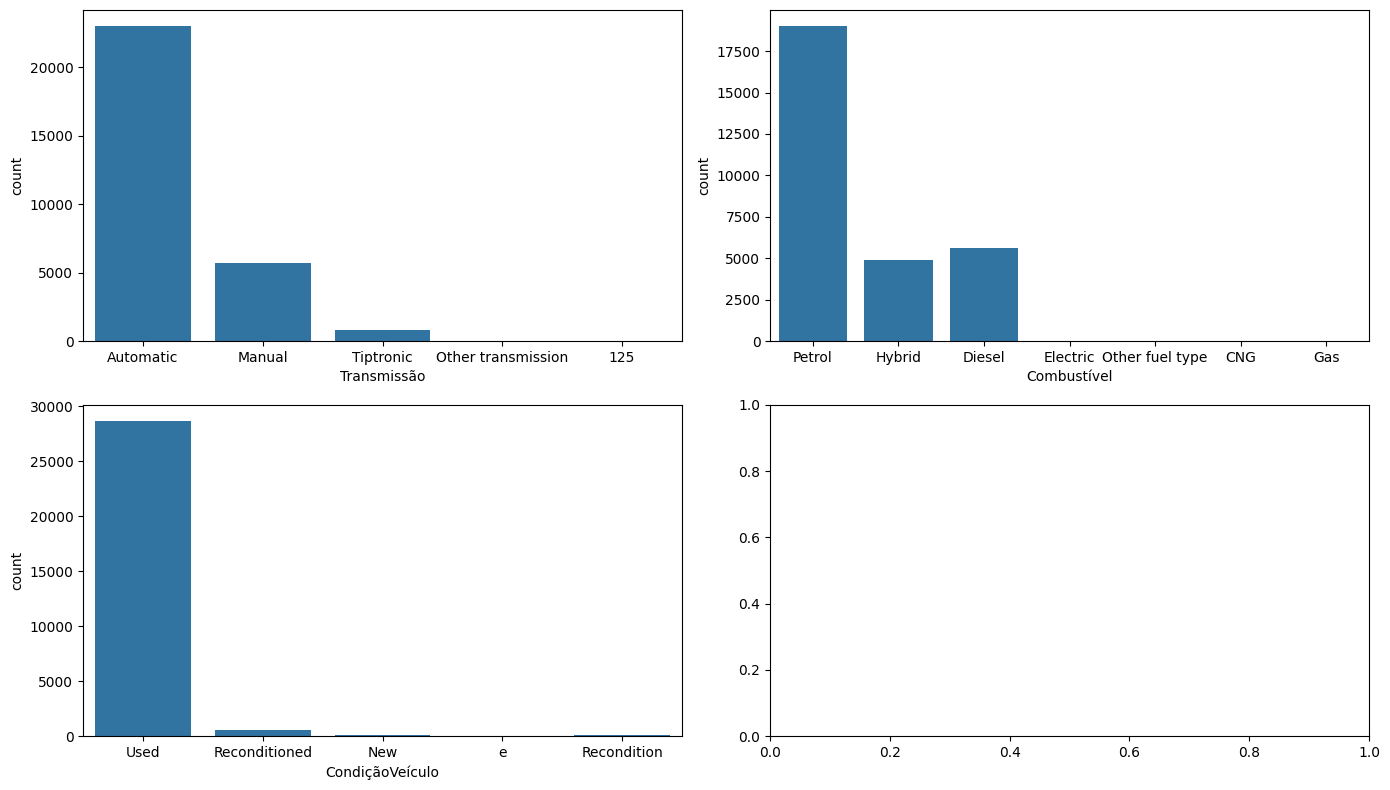

In [78]:

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Toyota, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Toyota, x="Combustível", ax=axes[0][1])
sns.countplot(data = Toyota, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [79]:
total_compras = Toyota.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Toyota.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Toyota.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$10,413,478,999.00","$8,507,744.28",1224
"Kohuwala, Colombo","$19,111,964,998.00","$15,966,553.88",1197
"Nugegoda, Colombo","$9,440,000,000.00","$12,291,666.67",768
Kandy,"$5,270,827,500.00","$6,880,975.85",766
"Negombo, Gampaha","$7,009,820,000.00","$9,358,905.21",749


### ANALISANDO AS MODELOS QUE MAIS VENDEU

In [80]:
total_compras = Toyota.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Toyota.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Toyota.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Vitz,"$20,213,189,999.00","$6,414,849.25",3151
Axio,"$19,211,094,952.00","$8,952,047.97",2146
Aqua,"$12,618,564,006.00","$6,084,167.79",2074
Premio,"$27,074,689,996.00","$13,098,543.78",2067
Prius,"$11,809,424,000.00","$6,830,204.74",1729


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [81]:
total_compras = Toyota.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Toyota.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Toyota.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$3,674,615,000.00","$8,486,408.78",433
Nandana Enterprises,"$3,211,670,000.00","$12,028,726.59",267
Suren Auto Mart,"$3,154,435,000.00","$12,981,213.99",243
Tele Ads,"$2,282,690,000.00","$9,796,952.79",233
MLS CARS,"$804,095,000.00","$5,702,801.42",141


### SUZUKI

In [82]:
Suzuki = df_traduzida.loc[df_traduzida['Marca'] == 'Suzuki']
Suzuki.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
8,4790000.00,Suzuki,Alto,2017,Used,Automatic,Hatchback,Petrol,650.00,46521.00,"Maharagama, Colombo",MAC Enterprises,Premium-Member,2022-10-01 08:29:00


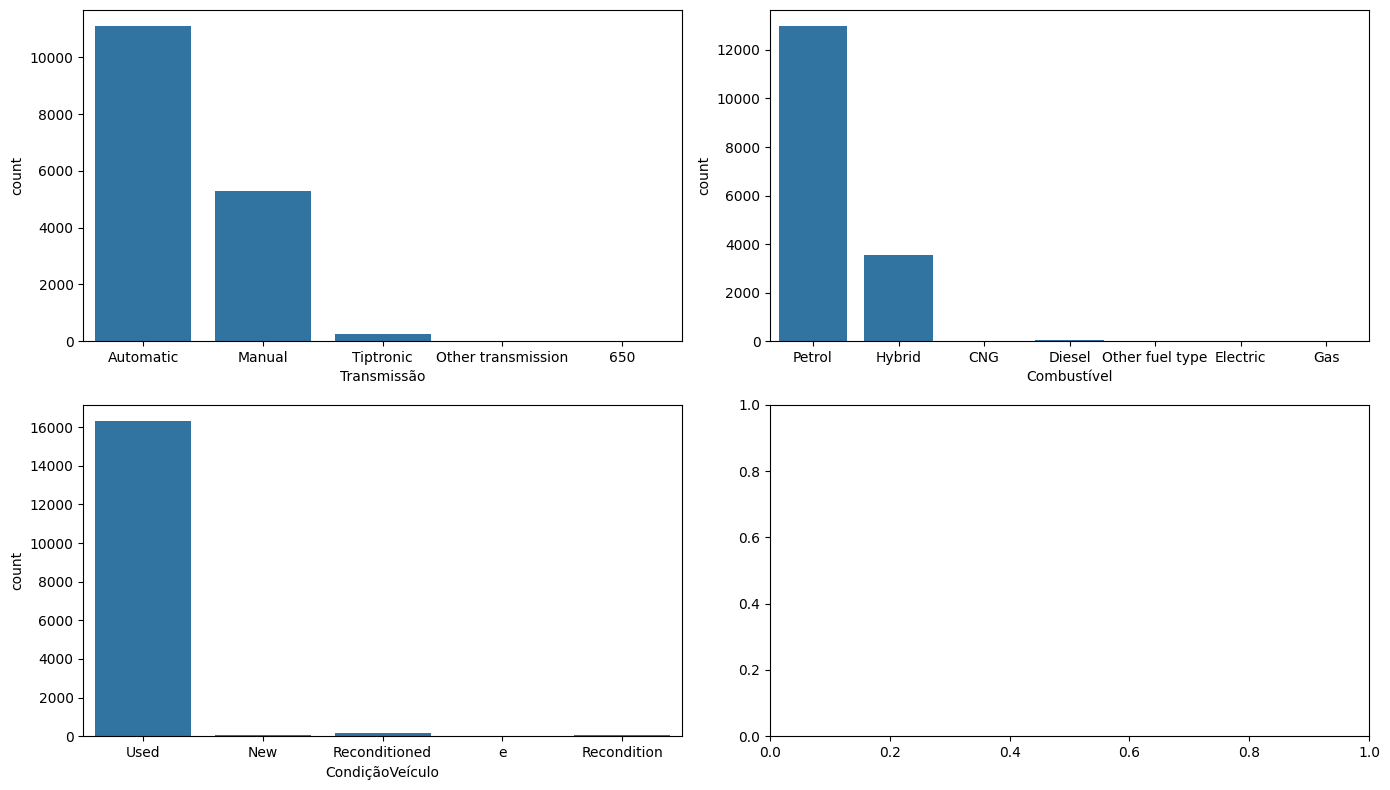

In [83]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Suzuki, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Suzuki, x="Combustível", ax=axes[0][1])
sns.countplot(data = Suzuki, x="CondiçãoVeículo", ax=axes[1][0])


plt.show()

### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [84]:
total_compras = Suzuki.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Suzuki.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Suzuki.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$4,512,493,999.00","$4,393,859.78",1027
Kandy,"$2,195,679,500.00","$3,558,637.76",617
Kurunegala,"$1,960,876,000.00","$3,458,335.10",567
"Malabe, Colombo","$2,142,144,999.00","$3,798,129.43",564
Gampaha,"$2,159,367,599.00","$3,869,834.41",558


### ANALISANDO OS MODELOS QUE MAIS VENDEU

In [85]:
total_compras = Suzuki.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Suzuki.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Suzuki.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Alto,"$9,142,750,496.00","$2,969,389.57",3079
Wagon R Stingray,"$11,705,286,500.00","$5,232,582.25",2237
Wagon R,"$6,470,111,507.00","$4,750,448.98",1362
Wagon R FZ,"$5,010,709,000.00","$4,864,766.02",1030
Swift,"$5,081,493,999.00","$5,031,182.18",1010


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [86]:
total_compras = Suzuki.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Suzuki.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Suzuki.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$946,351,000.00","$3,926,767.63",241
MAC Enterprises,"$980,005,000.00","$4,317,202.64",227
Jaela-MarutiGedara,"$337,770,000.00","$1,672,128.71",202
Punchi Car Niwasa,"$522,525,000.00","$3,679,753.52",142
MLS CARS,"$442,740,000.00","$3,659,008.26",121


### HONDA

In [87]:
Honda = df_traduzida.loc[df_traduzida['Marca'] == 'Honda']
Honda.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
0,12900000.00,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.00,37000.00,"Kurunegala City, Kurunegala",Prasad Enterprises,Premium-Member,2022-09-01 14:45:00


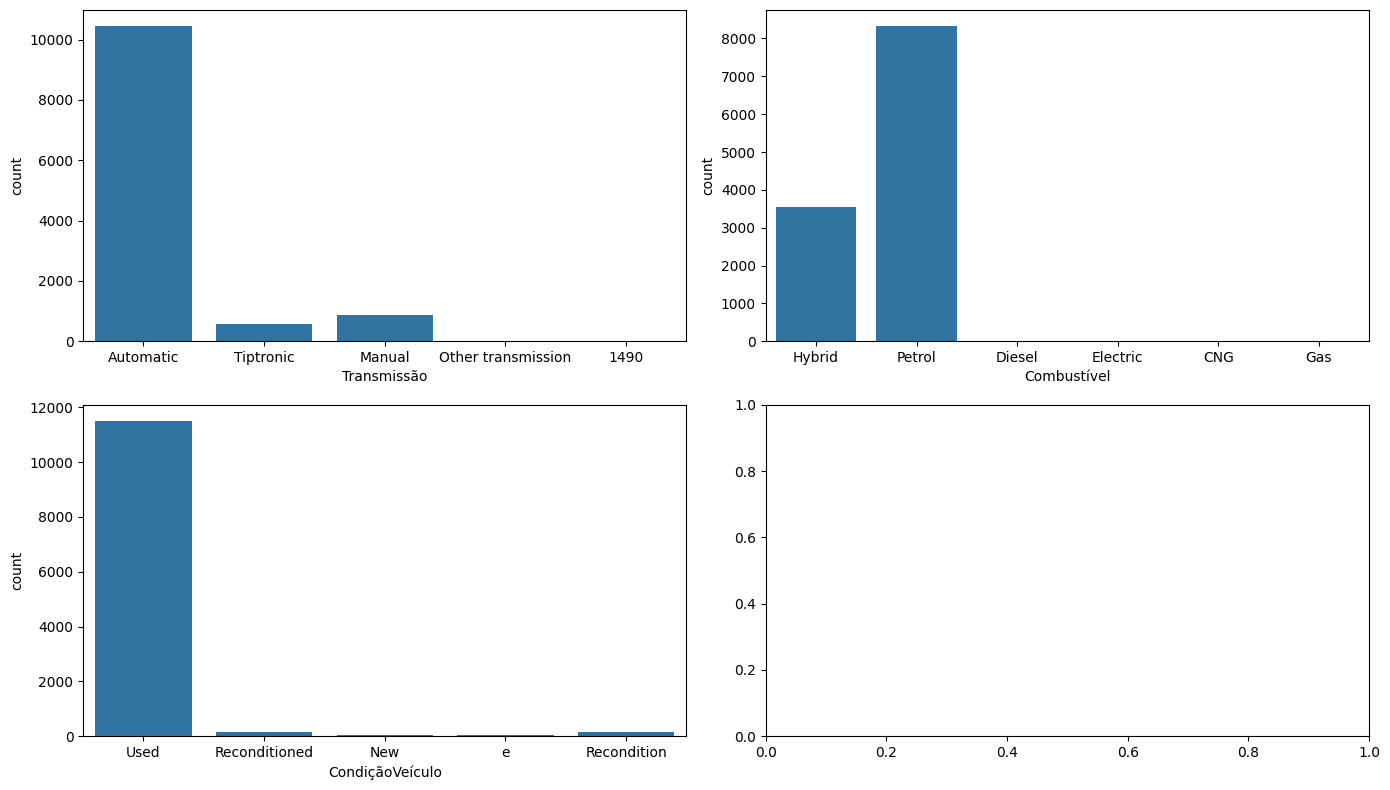

In [88]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Honda, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Honda, x="Combustível", ax=axes[0][1])
sns.countplot(data = Honda, x="CondiçãoVeículo", ax=axes[1][0])


plt.show()

### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [89]:
total_compras = Honda.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Honda.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Honda.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$3,440,361,911.00","$5,342,176.88",644
Kurunegala,"$1,293,347,900.00","$2,151,993.18",601
Gampaha,"$1,140,142,900.00","$2,441,419.49",467
"Kohuwala, Colombo","$4,954,123,000.00","$11,208,423.08",442
Kandy,"$1,233,221,500.00","$2,834,991.95",435


### ANALISANDO OS MODELOS QUE MAIS VENDEU

In [90]:
total_compras = Honda.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Honda.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Honda.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Vezel,"$16,619,078,000.00","$9,061,656.49",1834
Dio,"$1,240,346,233.00","$686,411.86",1807
Fit,"$5,872,268,999.00","$5,860,547.90",1002
Civic,"$5,647,868,500.00","$7,684,174.83",735
Grace,"$4,879,519,998.00","$8,904,233.57",548


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [91]:
total_compras = Honda.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Honda.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Honda.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Dushan Enterprise,"$1,060,950,000.00","$6,352,994.01",167
Owner,"$704,429,000.00","$5,141,817.52",137
Suren Auto Mart,"$1,469,198,000.00","$12,142,132.23",121
NIROSHAN MOTOR TRADERS,"$462,815,000.00","$7,120,230.77",65
Nandana Enterprises,"$615,195,000.00","$9,612,421.88",64


### BAJAJ

In [92]:
Bajaj = df_traduzida.loc[df_traduzida['Marca'] == 'Bajaj']
Bajaj.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
61694,135000.00,Bajaj,Discover 125,2007,Used,Automatic,Motorbike,Petrol,125.00,980000.00,Gampaha,Ashan,Member,2021-11-04 19:18:00


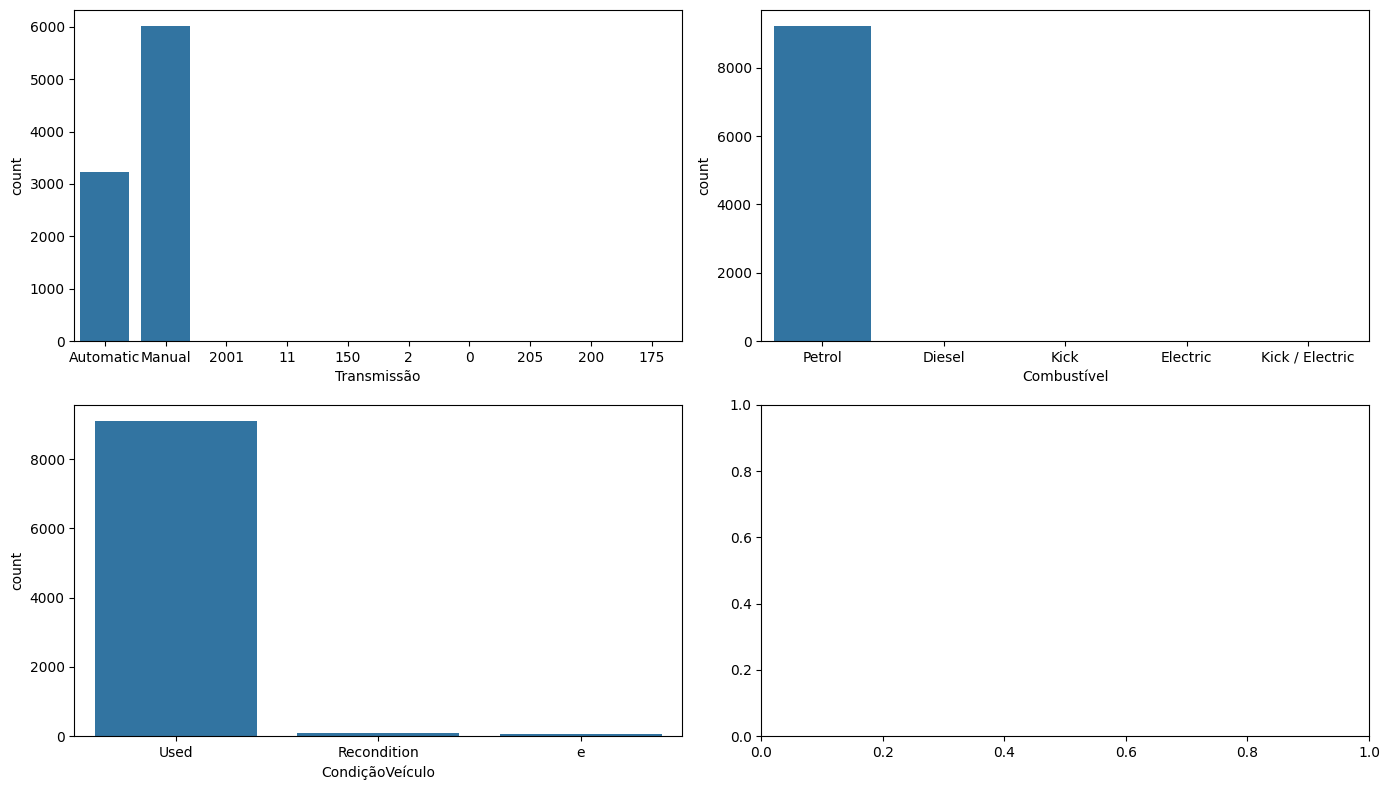

In [93]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Bajaj, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Bajaj, x="Combustível", ax=axes[0][1])
sns.countplot(data = Bajaj, x="CondiçãoVeículo", ax=axes[1][0])


plt.show()

### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [94]:
total_compras = Bajaj.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Bajaj.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Bajaj.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Kurunegala,"$580,394,500.00","$779,053.02",745
Gampaha,"$504,118,500.00","$680,321.86",741
Kandy,"$618,719,111.00","$838,372.78",738
Colombo,"$364,794,499.00","$755,268.11",483
Galle,"$289,720,000.00","$664,495.41",436


### ANALISANDO OS MODELOS QUE MAIS VENDEU

In [95]:
total_compras = Bajaj.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Bajaj.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Bajaj.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
RE,"$2,213,162,010.00","$1,115,505.05",1984
CT-100,"$478,929,000.00","$443,452.78",1080
Pulsar 150,"$300,695,833.00","$603,806.89",498
2 Stroke,"$340,411,000.00","$707,715.18",481
Discover,"$191,440,400.00","$495,959.59",386


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [96]:
total_compras = Bajaj.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Bajaj.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Bajaj.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$62,568,000.00","$744,857.14",84
Kumara,"$35,797,000.00","$675,415.09",53
Kasun,"$74,248,000.00","$1,400,905.66",53
Roshan,"$36,250,000.00","$739,795.92",49
Asanka,"$30,127,000.00","$654,934.78",46


### NISSAN

In [97]:
Nissan = df_traduzida.loc[df_traduzida['Marca'] == 'Nissan']
Nissan.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
61,3975000.00,Nissan,Sunny,2003,Reconditioned,Manual,Saloon,Petrol,1600.00,158000.00,"Maharagama, Colombo",SS Enterprises,Premium-Member,2022-10-01 05:10:00


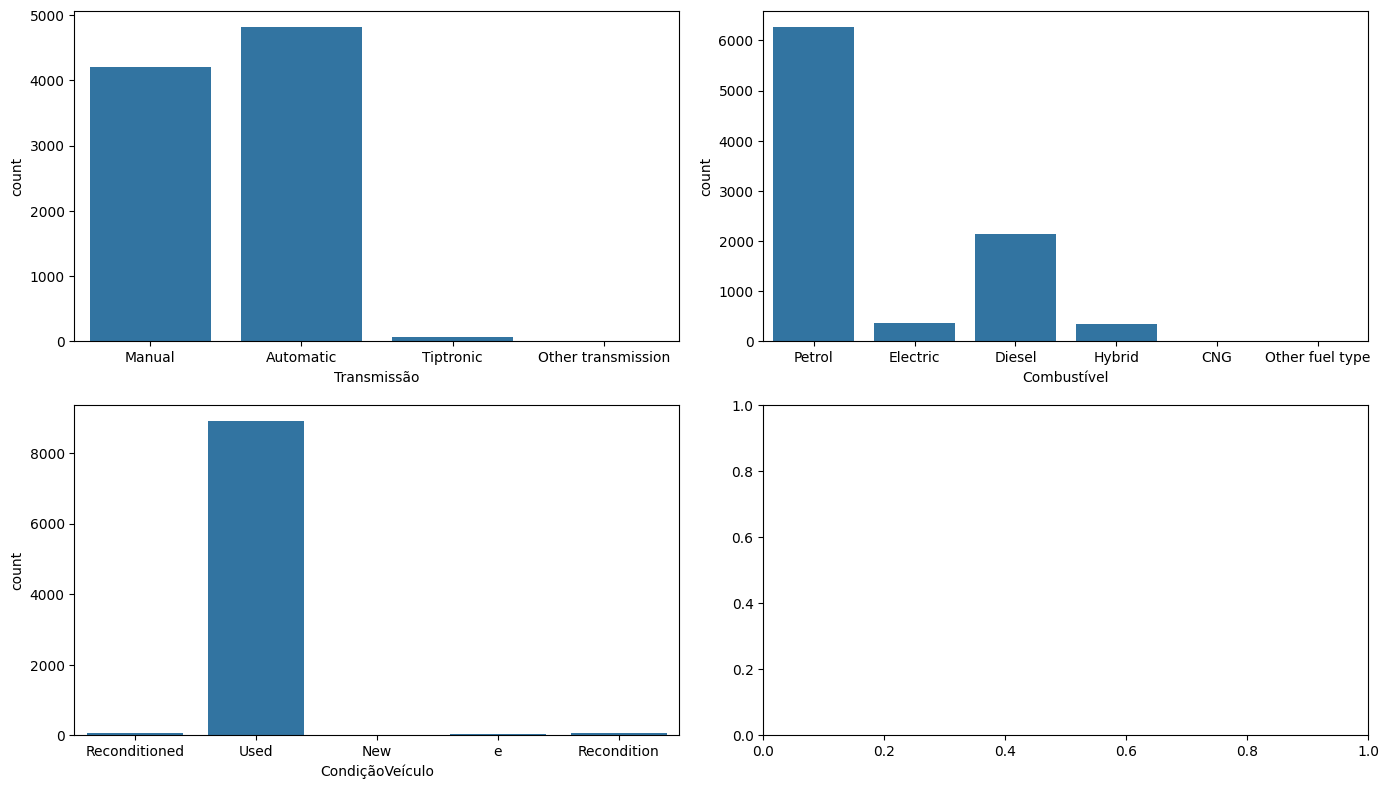

In [98]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Nissan, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Nissan, x="Combustível", ax=axes[0][1])
sns.countplot(data = Nissan, x="CondiçãoVeículo", ax=axes[1][0])


plt.show()

### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [99]:
total_compras = Nissan.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Nissan.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Nissan.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Kurunegala,"$1,391,030,000.00","$3,401,051.34",409
Colombo,"$1,751,675,000.00","$4,838,881.22",362
Gampaha,"$935,815,000.00","$2,752,397.06",340
Kandy,"$1,001,845,004.00","$3,578,017.87",280
"Malabe, Colombo","$865,471,009.00","$3,158,653.32",274


### ANALISANDO OS MODELOS QUE MAIS VENDEU

In [100]:
total_compras = Nissan.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Nissan.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = Nissan.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Sunny,"$3,706,191,000.00","$2,098,635.90",1766
March,"$1,628,032,456.00","$2,660,183.75",612
X-Trail,"$5,011,165,000.00","$9,618,358.93",521
Vanette,"$1,257,781,999.00","$3,258,502.59",386
Leaf,"$974,875,000.00","$3,075,315.46",317


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [101]:
total_compras = Nissan.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Nissan.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Nissan.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$428,565,000.00","$3,631,906.78",118
MLS CARS,"$133,275,000.00","$2,562,980.77",52
S & D CARS NEGOMBO,"$181,680,000.00","$3,707,755.10",49
Tele Ads,"$181,450,000.00","$4,032,222.22",45
Dushan Enterprise,"$204,525,000.00","$4,869,642.86",42


# ANALISANDO OS MODELOS

### OS MODELOS MAIS VENDIDOS, LUCROS E MÉDIA DOS PREÇOS

In [102]:
total_compras = df_traduzida.groupby(["Modelo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["Modelo"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["Modelo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Modelo,,,
Alto,"$9,552,645,496.00","$2,938,371.42",3251
Vitz,"$20,213,189,999.00","$6,414,849.25",3151
Wagon R Stingray,"$11,705,286,500.00","$5,232,582.25",2237
Axio,"$19,211,094,952.00","$8,952,047.97",2146
Aqua,"$12,618,564,006.00","$6,084,167.79",2074


### OS 5 MODELOS MAIS VENDIDOS

### ALTO

In [103]:
Alto = df_traduzida.loc[df_traduzida['Modelo'] == 'Alto']
Alto.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
8,4790000.00,Suzuki,Alto,2017,Used,Automatic,Hatchback,Petrol,650.00,46521.00,"Maharagama, Colombo",MAC Enterprises,Premium-Member,2022-10-01 08:29:00


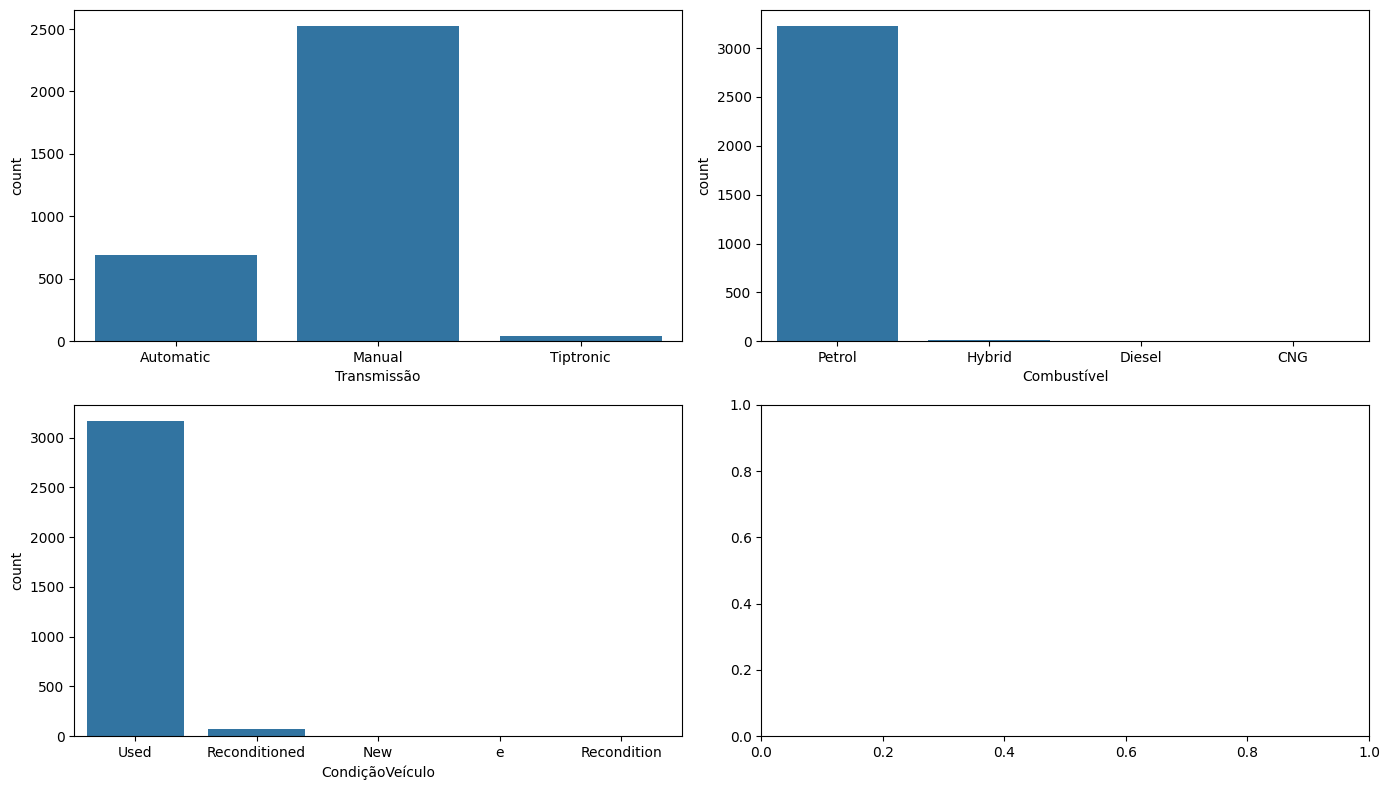

In [104]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Alto, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Alto, x="Combustível", ax=axes[0][1])
sns.countplot(data = Alto, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MARCAS QUE MAIS VENDEU

In [105]:
total_compras = Alto.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Alto.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = Alto.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Suzuki,"$9,142,750,496.00","$2,969,389.57",3079
Maruti Suzuki,"$407,215,000.00","$2,381,374.27",171
Acura,"$2,680,000.00","$2,680,000.00",1


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [106]:
total_compras = Alto.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Alto.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Alto.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
MAC Enterprises,"$478,695,000.00","$4,312,567.57",111
Punchi Car Niwasa,"$115,270,000.00","$2,619,772.73",44
MLS CARS,"$110,105,000.00","$2,685,487.80",41
RAGAMA ADS,"$94,925,000.00","$2,565,540.54",37
VRR Enterprises (Pvt) Ltd,"$134,355,000.00","$4,478,500.00",30


### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [107]:
total_compras = Alto.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Alto.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Alto.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
"Malabe, Colombo","$445,079,999.00","$2,713,902.43",164
"Maharagama, Colombo","$551,185,000.00","$3,937,035.71",140
Kurunegala,"$248,770,000.00","$2,795,168.54",89
Gampaha,"$225,056,000.00","$2,848,810.13",79
Colombo,"$236,430,000.00","$3,031,153.85",78


### VITZ

In [108]:
Vitz = df_traduzida.loc[df_traduzida['Modelo'] == 'Vitz']
Vitz.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
10,7800000.00,Toyota,Vitz,2017,Used,Automatic,Hatchback,Petrol,1000.00,29000.00,"Angoda, Colombo",Dilanka Prasad,Premium-Member,2022-09-28 08:20:00


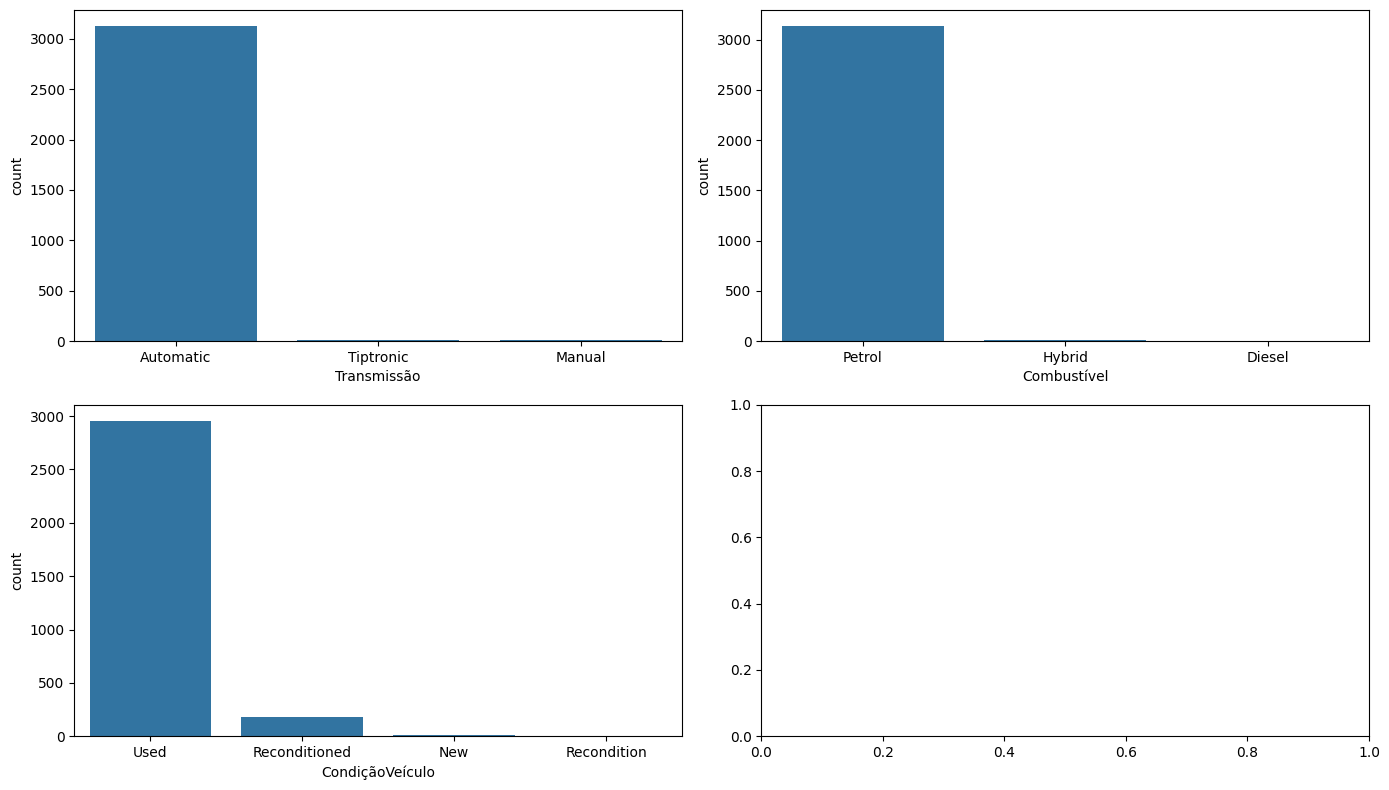

In [109]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Vitz, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Vitz, x="Combustível", ax=axes[0][1])
sns.countplot(data = Vitz, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MARCAS QUE MAIS VENDEU

In [110]:
total_compras = Vitz.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Vitz.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = Vitz.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Toyota,"$20,213,189,999.00","$6,414,849.25",3151


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [111]:
total_compras = Vitz.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Vitz.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Vitz.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Ruvisha Motor Traders,"$580,675,000.00","$7,541,233.77",77
Gayuki Holdings (Pvt) Ltd,"$431,830,000.00","$7,445,344.83",58
Nandana Enterprises,"$395,490,000.00","$7,462,075.47",53
Owner,"$313,590,000.00","$6,399,795.92",49
Punchi Car Niwasa,"$205,555,000.00","$4,894,166.67",42


### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [112]:
total_compras = Vitz.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Vitz.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Vitz.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
"Negombo, Gampaha","$1,127,755,000.00","$6,961,450.62",162
"Malabe, Colombo","$733,200,000.00","$5,554,545.45",132
"Nugegoda, Colombo","$662,375,000.00","$6,690,656.57",99
"Kohuwala, Colombo","$661,545,000.00","$6,750,459.18",98
"Matara City, Matara","$573,365,000.00","$6,035,421.05",95


### WAGON R STINGRAY

In [113]:
Wagon = df_traduzida.loc[df_traduzida['Modelo'] == 'Wagon R Stingray']
Wagon.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
23,5400000.00,Suzuki,Wagon R Stingray,2014,Used,Automatic,Hatchback,Petrol,650.00,43400.00,"Katugastota, Kandy",RMS Kanthie,Premium-Member,2022-09-26 10:29:00


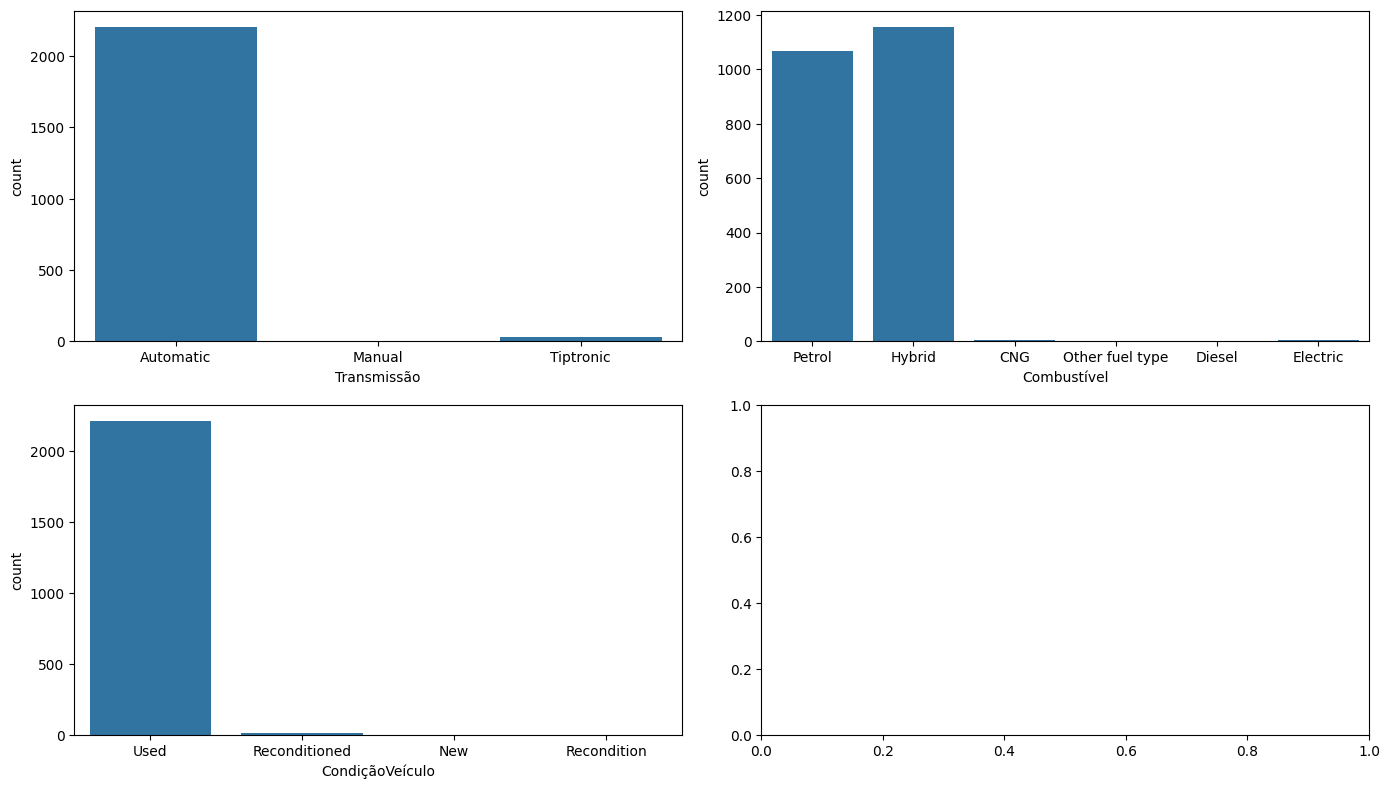

In [114]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Wagon, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Wagon, x="Combustível", ax=axes[0][1])
sns.countplot(data = Wagon, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MARCAS QUE MAIS VENDEU

In [115]:
total_compras = Wagon.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Wagon.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = Wagon.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Suzuki,"$11,705,286,500.00","$5,232,582.25",2237


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [116]:
total_compras = Wagon.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Wagon.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Wagon.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$192,805,000.00","$5,073,815.79",38
Lucky Enterprises,"$155,980,000.00","$5,031,612.90",31
MLS CARS,"$119,150,000.00","$5,180,434.78",23
Tele Ads,"$104,950,000.00","$4,770,454.55",22
Nandana Enterprises,"$112,955,000.00","$5,378,809.52",21


### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [117]:
total_compras = Wagon.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Wagon.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Wagon.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$600,415,000.00","$5,360,848.21",112
"Malabe, Colombo","$405,085,000.00","$4,880,542.17",83
"Matara City, Matara","$361,390,000.00","$5,237,536.23",69
"Dehiwala, Colombo","$323,525,000.00","$4,901,893.94",66
"Kohuwala, Colombo","$325,775,000.00","$5,171,031.75",63


### AXIO

In [118]:
Axio = df_traduzida.loc[df_traduzida['Modelo'] == 'Axio']
Axio.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
34,14500000.00,Toyota,Axio,2019,Used,Automatic,Saloon,Hybrid,1500.00,17000.00,"Panadura, Kalutara",Princy K Jayawardana,Member,2022-10-01 07:10:00


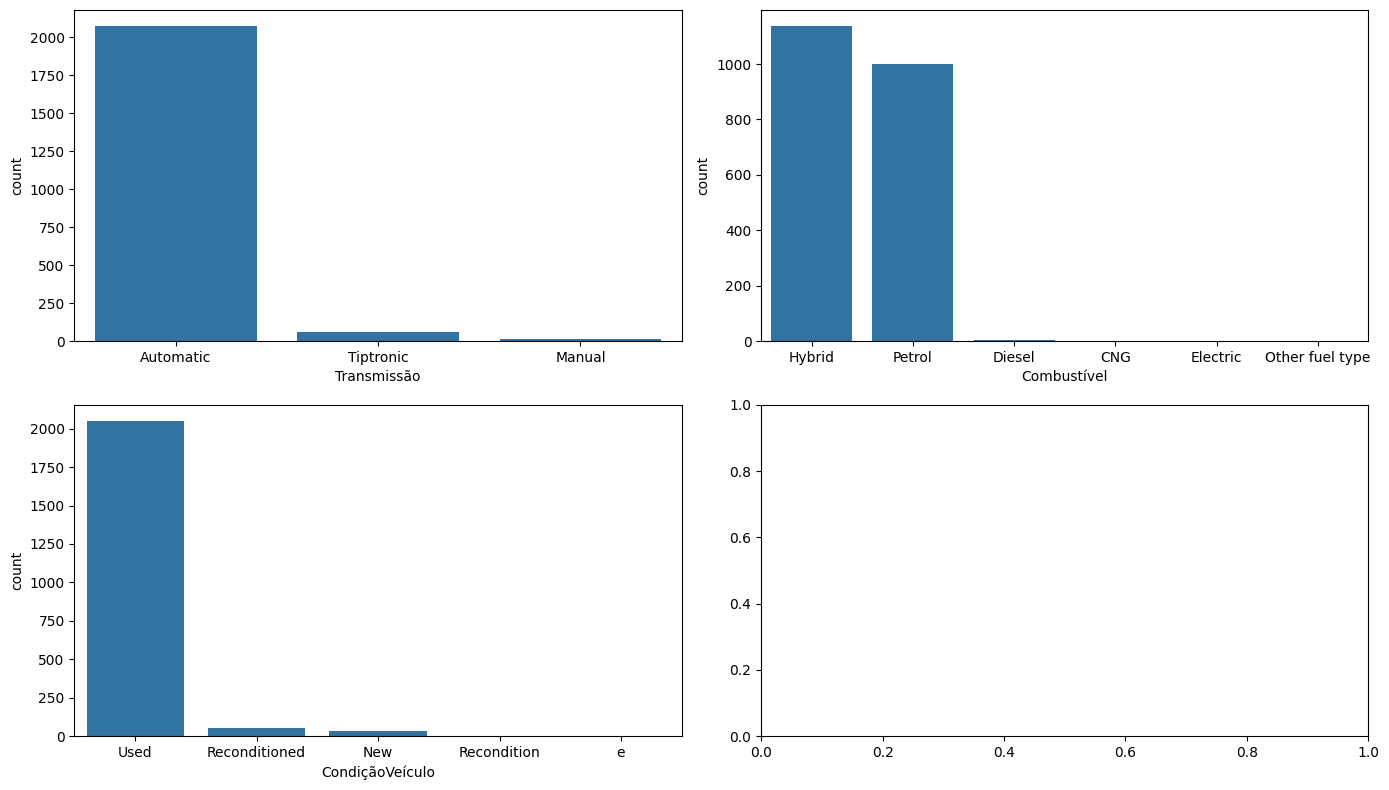

In [119]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Axio, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Axio, x="Combustível", ax=axes[0][1])
sns.countplot(data = Axio, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MARCAS QUE MAIS VENDEU

In [120]:
total_compras = Axio.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Axio.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = Axio.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Toyota,"$19,211,094,952.00","$8,952,047.97",2146


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [121]:
total_compras = Axio.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Axio.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Axio.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Suren Auto Mart,"$419,085,000.00","$9,313,000.00",45
Irahanda Trading,"$510,300,000.00","$12,757,500.00",40
Dammika Motor Traders (Pvt) Ltd,"$222,675,000.00","$9,278,125.00",24
Nandana Enterprises,"$180,705,000.00","$8,213,863.64",22
Tele Ads,"$136,280,000.00","$7,571,111.11",18


### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [122]:
total_compras = Axio.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Axio.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Axio.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
"Kohuwala, Colombo","$1,316,910,000.00","$8,838,322.15",149
"Nugegoda, Colombo","$940,180,000.00","$9,308,712.87",101
"Boralesgamuwa, Colombo","$869,650,000.00","$10,352,976.19",84
"Negombo, Gampaha","$502,155,000.00","$7,725,461.54",65
Colombo,"$494,540,000.00","$8,382,033.90",59


### AQUA

In [123]:
Aqua = df_traduzida.loc[df_traduzida['Modelo'] == 'Aqua']
Aqua.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
25,8050000.00,Toyota,Aqua,2016,Used,Automatic,Hatchback,Petrol,1500.00,49750.00,"Embilipitiya, Ratnapura",dilshan,Premium-Member,2022-09-27 07:32:00


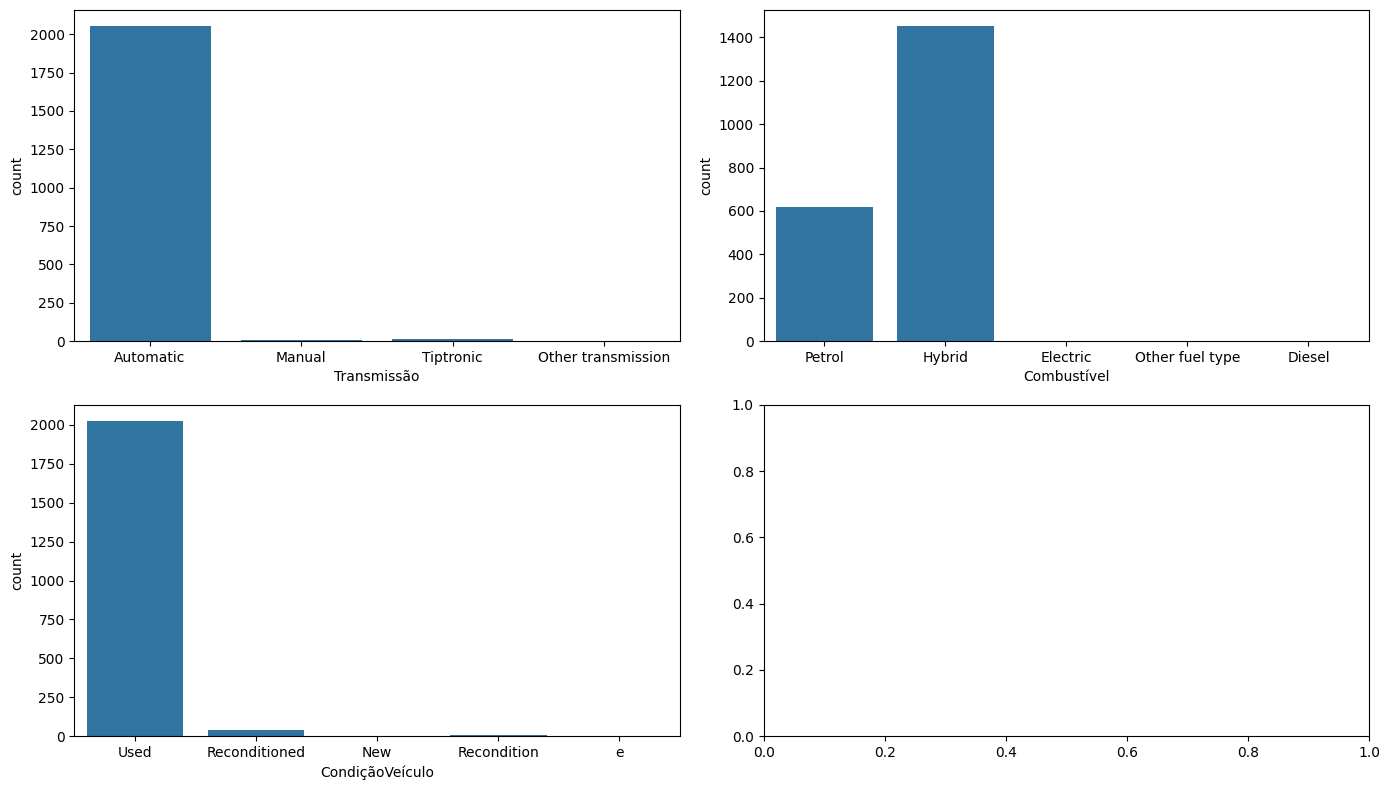

In [124]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Aqua, x="Transmissão", ax=axes[0][0])
sns.countplot(data = Aqua, x="Combustível", ax=axes[0][1])
sns.countplot(data = Aqua, x="CondiçãoVeículo", ax=axes[1][0])

plt.show()

### ANALISANDO AS MARCAS QUE MAIS VENDEU

In [125]:
total_compras = Aqua.groupby(["Marca"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Aqua.groupby(["Marca"])["Preço"].mean().rename("Média dos Carros")
numero = Aqua.groupby(["Marca"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Marca,,,
Toyota,"$12,618,564,006.00","$6,084,167.79",2074


### ANALISANDO OS VENDEDORES QUE MAIS VENDEU

In [126]:
total_compras = Aqua.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Aqua.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = Aqua.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Dushan Enterprise,"$234,675,000.00","$7,333,593.75",32
MLS CARS,"$160,975,000.00","$5,749,107.14",28
Tele Ads,"$126,585,000.00","$5,753,863.64",22
Patlo Agencies (Pvt) Ltd,"$121,500,000.00","$6,394,736.84",19
Tharindu,"$106,470,000.00","$7,098,000.00",15


### ANALISANDO AS LOCALIZAÇÕES ONDE MAIS VENDEU

In [127]:
total_compras = Aqua.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = Aqua.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = Aqua.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(5)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
"Matara City, Matara","$566,135,000.00","$6,221,263.74",91
"Dehiwala, Colombo","$467,470,000.00","$6,403,698.63",73
"Kohuwala, Colombo","$481,600,000.00","$6,688,888.89",72
Colombo,"$423,245,000.00","$5,878,402.78",72
"Negombo, Gampaha","$403,440,000.00","$6,206,769.23",65


### ANALISANDO AS TRANSMISSÕES MAIS VENDIDOS, LUCROS E MÉDIA DOS PREÇOS

In [128]:
total_compras = df_traduzida.groupby(["Transmissão"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["Transmissão"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["Transmissão"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(10)

,Preço total dos carros,Média dos Carros,Número de compras
Transmissão,,,
Automatic,"$548,360,964,367.00","$7,704,512.38",71174
Manual,"$100,562,909,685.00","$2,451,199.48",41026
Tiptronic,"$96,616,050,207.00","$19,135,680.37",5049
Other transmission,"$618,780,000.00","$15,866,153.85",39
205,"$5,555,000.00","$1,111,000.00",5
150,"$9,725,000.00","$1,945,000.00",5
175,"$2,815,000.00","$703,750.00",4
0,"$1,790,000.00","$447,500.00",4
1500,"$2,600,000.00","$1,300,000.00",2


### ANALISANDO OS VENDEDORES QUE MAIS VENDERAM, LUCROS E MÉDIA DOS PREÇOS

In [129]:
total_compras = df_traduzida.groupby(["NomeVendedor"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["NomeVendedor"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["NomeVendedor"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(10)

,Preço total dos carros,Média dos Carros,Número de compras
NomeVendedor,,,
Owner,"$9,253,213,000.00","$5,758,066.58",1607
Nandana Enterprises,"$6,869,100,000.00","$11,467,612.69",599
Tele Ads,"$5,119,143,516.00","$8,632,619.76",593
Dushan Enterprise,"$3,503,130,000.00","$6,475,286.51",541
Suren Auto Mart,"$6,150,468,000.00","$12,325,587.17",499
Punchi Car Niwasa,"$1,748,653,000.00","$3,681,374.74",475
MLS CARS,"$1,878,140,000.00","$4,419,152.94",425
MAC Enterprises,"$2,059,365,000.00","$5,280,423.08",390
Asanka,"$1,571,318,500.00","$4,167,953.58",377


### ANALISANDO OS TIPOS DE VENDEDORES QUE MAIS VENDERAM, LUCROS E MÉDIA DOS PREÇOS

In [130]:
total_compras = df_traduzida.groupby(["VendedorTipo"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["VendedorTipo"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["VendedorTipo"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(10)

,Preço total dos carros,Média dos Carros,Número de compras
VendedorTipo,,,
Member,"$449,267,449,939.00","$5,074,977.41",88526
Premium-Member,"$296,946,584,320.00","$10,312,793.79",28794


### ANALISANDO AS CIDADES QUE MAIS VENDERAM, LUCROS E MÉDIA DOS PREÇOS

In [131]:
total_compras = df_traduzida.groupby(["Localização"])["Preço"].sum().rename("Preço total dos carros")
media_compra = df_traduzida.groupby(["Localização"])["Preço"].mean().rename("Média dos Carros")
numero = df_traduzida.groupby(["Localização"])["Preço"].count().rename('Número de compras')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Preço total dos carros": total_compras, "Média dos Carros":media_compra,"Número de compras":numero})

# Manipulação de Dados
dados_usuarios ["Preço total dos carros"] = dados_usuarios["Preço total dos carros"].map("${:,.2f}".format)
dados_usuarios ["Média dos Carros"] = dados_usuarios["Média dos Carros"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de compras", ascending=False).head(10)

,Preço total dos carros,Média dos Carros,Número de compras
Localização,,,
Colombo,"$31,678,169,751.00","$5,609,734.33",5647
Kurunegala,"$13,518,426,389.00","$2,960,023.30",4567
Gampaha,"$13,691,685,998.00","$3,193,768.60",4287
Kandy,"$14,781,970,380.00","$3,523,711.65",4195
"Kohuwala, Colombo","$80,711,112,207.00","$19,481,320.83",4143
"Malabe, Colombo","$15,295,149,000.00","$5,490,003.23",2786
Matara,"$8,327,012,011.00","$3,283,522.09",2536
Galle,"$7,238,977,009.00","$3,044,145.08",2378
"Nugegoda, Colombo","$24,935,394,999.00","$11,092,257.56",2248


# MACHINE LEARNING

## PRÉ PROCESSAMENTO DOS DADOS 

In [132]:
df_traduzida.head(1)

,Preço,Marca,Modelo,Ano,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,Localização,NomeVendedor,VendedorTipo,DataPublicada
0,12900000.00,Honda,Vezel,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.00,37000.00,"Kurunegala City, Kurunegala",Prasad Enterprises,Premium-Member,2022-09-01 14:45:00


In [133]:

del df_traduzida['DataPublicada']
del df_traduzida['NomeVendedor']
del df_traduzida['Ano']
del df_traduzida['Localização']

In [134]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['Marca'] = lb.fit_transform(df_traduzida['Marca'])
df_traduzida['Modelo'] = lb.fit_transform(df_traduzida['Modelo'])
df_traduzida['CondiçãoVeículo'] = lb.fit_transform(df_traduzida['CondiçãoVeículo'])
df_traduzida['Transmissão'] = lb.fit_transform(df_traduzida['Transmissão'])
df_traduzida['TipoCarroceria'] = lb.fit_transform(df_traduzida['TipoCarroceria'])
df_traduzida['Combustível'] = lb.fit_transform(df_traduzida['Combustível'])
df_traduzida['VendedorTipo'] = lb.fit_transform(df_traduzida['VendedorTipo'])
# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [135]:
df_traduzidaa =df_traduzida[['Marca','Modelo','CondiçãoVeículo','Transmissão','TipoCarroceria','Combustível','Capacidade','Quilometragem','VendedorTipo','Preço']]

In [136]:
df_traduzida.head(1)

,Preço,Marca,Modelo,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,VendedorTipo
0,12900000.00,41,7845,3,16,14,4,1500.00,37000.00,1


### PADRONIZAÇÃO

In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Criando um objeto para PADRONIZAÇÃO dos dados
obj_padronizacao = StandardScaler().fit(df_traduzidaa)

In [138]:
# Aplicando a PADRONIZAÇÃO
df_padronizado = obj_padronizacao.transform(df_traduzidaa)

In [139]:
# Observe que é criado um ARRAY dos dados
df_padronizado

array([[-1.0063977 ,  1.2790199 ,  0.12700781, ..., -0.03742297,
         1.7534138 ,  0.68274465],
       [-0.7819606 ,  1.42369262,  0.12700781, ..., -0.03695305,
        -0.57031603,  1.0324954 ],
       [ 0.95742691, -1.09846068,  0.12700781, ..., -0.03949061,
        -0.57031603,  1.11079781],
       ...,
       [ 0.95742691,  1.30710796,  0.12700781, ..., -0.03798687,
        -0.57031603,  0.06415562],
       [ 0.78909908, -1.40896834,  0.12700781, ..., -0.03591922,
        -0.57031603, -0.38999835],
       [ 0.95742691,  0.25784601,  0.12700781, ...,  0.33503538,
        -0.57031603, -0.43958988]])

In [140]:
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['Modelo', 'Marca','CondiçãoVeículo', 'Transmissão', 'TipoCarroceria',
                          'Combustível', 'Capacidade', 'Quilometragem', 'VendedorTipo', 'Preço']


In [141]:
df_padronizado.head()

,Modelo,Marca,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,VendedorTipo,Preço
0,-1.01,1.28,0.13,-0.65,0.71,-0.79,-0.21,-0.04,1.75,0.68
1,-0.78,1.42,0.13,-0.65,0.90,-1.86,-0.20,-0.04,-0.57,1.03
2,0.96,-1.10,0.13,-0.65,0.71,0.63,-0.21,-0.04,-0.57,1.11
3,0.96,-1.10,0.13,-0.65,0.71,0.63,-0.21,-0.04,-0.57,0.69
4,0.96,0.26,0.13,-0.65,0.71,0.63,-0.20,-0.04,-0.57,2.83


In [142]:
df_padronizado.describe()

,Modelo,Marca,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,VendedorTipo,Preço
count,117320.00,117320.00,117320.00,117320.00,117320.00,117320.00,117320.00,117320.00,117320.00,117320.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.16,-1.74,-9.70,-22.50,-1.89,-2.21,-0.21,-0.04,-0.57,-0.66
25%,-1.01,-0.93,0.13,-0.65,-0.77,-0.79,-0.21,-0.04,-0.57,-0.52
50%,0.09,0.21,0.13,-0.65,-0.03,0.63,-0.21,-0.03,-0.57,-0.25
75%,0.96,0.82,0.13,0.71,0.90,0.63,-0.20,-0.03,-0.57,0.09
max,1.27,1.52,3.40,4.81,2.02,0.63,4.88,104.39,1.75,73.75


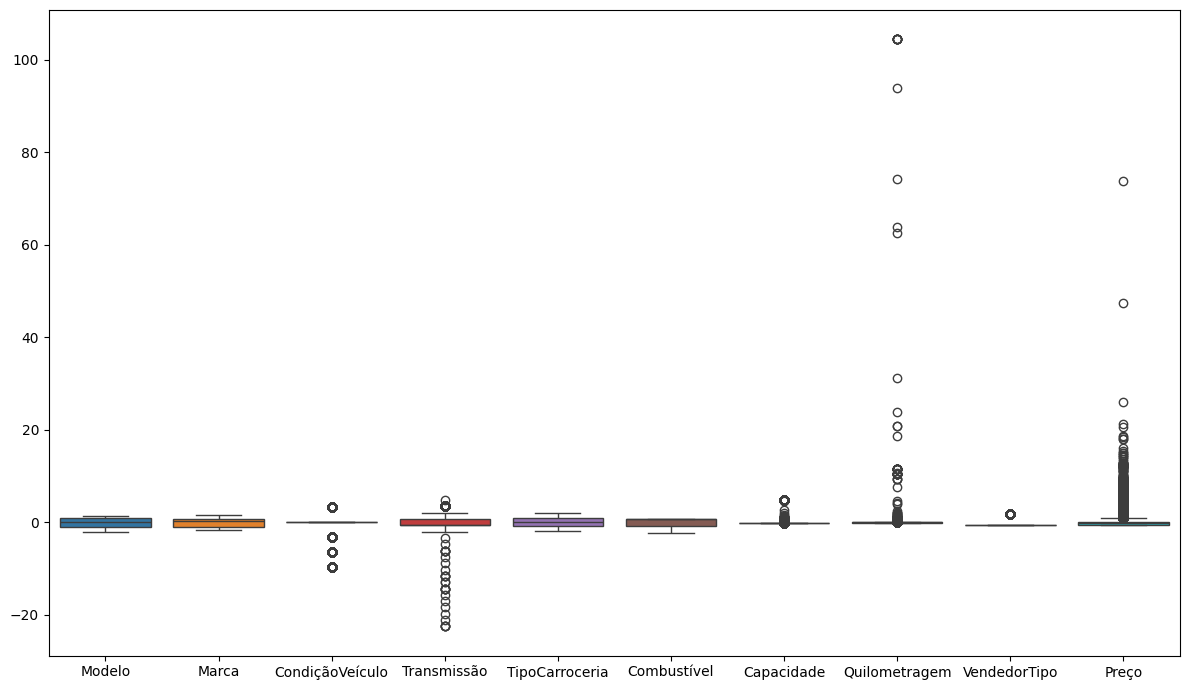

In [143]:
# Gerando os BoxPlot dos dados Padronizados
plt.figure(figsize=(12,7))
ax = sns.boxplot(data = df_padronizado)

In [144]:
X = df_padronizado.iloc[:, :-1]
y = df_padronizado.iloc[:, -1]

In [145]:
X.head(1)

,Modelo,Marca,CondiçãoVeículo,Transmissão,TipoCarroceria,Combustível,Capacidade,Quilometragem,VendedorTipo
0,-1.01,1.28,0.13,-0.65,0.71,-0.79,-0.21,-0.04,1.75


In [146]:
y.head(1)

0   0.68
Name: Preço, dtype: float64

In [147]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### RandomForestRegresso

In [148]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)
    
# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6476649736262088
0.40744134039612806


### XGBOOST

In [149]:
# check xgboost version
from xgboost import XGBRegressor

# Criando o modelo
modelo1 = XGBRegressor()

# Treinando o modelo
modelo1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
# Fazendo previsões
y_predI = modelo1.predict(X_test)
previsoes = [round(value) for value in y_predI]

In [151]:
# Scores:
print(r2_score(y_test, y_predI))

# Calculando o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predI)

# Calculando o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_predI)

#Erro Médio Absoluto (MAE): 
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predI)

print("#Erro Médio Absoluto (MAE): %.2f" % mae)
print("Mean Squared Error (MSE): %.2f" % mse)
print("Coeficiente de Determinação (R²): %.2f" % r2)

0.6628717739263039
#Erro Médio Absoluto (MAE): 0.18
Mean Squared Error (MSE): 0.39
Coeficiente de Determinação (R²): 0.66


### MELHORANDO O MODELO DE MACHINE LEARNING

In [152]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Criar uma instância do modelo XGBoost para regressão
model = XGBRegressor()

# Definir os parâmetros que deseja otimizar
param_dist = {
    'learning_rate': np.arange(0.01, 0.31, 0.05),
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(3, 10, 1),
    'min_child_weight': range(1, 6, 1),
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': np.arange(0.6, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

# Criar o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Treinar o modelo
random_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Melhores hiperparâmetros: {'subsample': 0.7999999999999999, 'reg_alpha': 0.01, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.16000000000000003, 'gamma': 0.3, 'colsample_bytree': 0.6}


In [153]:
# Melhor modelo com os hiperparâmetros otimizados
best_model = random_search.best_estimator_

# Prever os valores para o conjunto de validação/teste

y_predIto = best_model.predict(X_test)  # Substitua X_valid pelos seus dados de validação/teste

# Calcular as métricas de avaliação, por exemplo, o erro médio quadrático (MSE)


mse = mean_squared_error(y_test, y_predIto)  # Substitua y_valid pelos seus valores verdadeiros]

r2a = r2_score(y_test, y_predIto)
print("Erro Médio Quadrático (MSE) no conjunto de validação:", mse)
print("Erro Médio Quadrático (MSE) no conjunto de validação:", r2a )

Erro Médio Quadrático (MSE) no conjunto de validação: 0.3863677806806836
Erro Médio Quadrático (MSE) no conjunto de validação: 0.665888340972566
